<a href="https://colab.research.google.com/github/EugeniaBar/An-lisis-de-datos-climaticos/blob/main/Efectoinvernadero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🔹 1. INGESTA Y EXPLORACIÓN INICIAL

📌 Objetivo: Cargar los datos y hacer una primera inspección para conocer su estructura.
- ✔ Cargar el dataset desde un archivo CSV, base de datos u otra fuente.
- ✔ Revisar el tamaño del dataset (data.shape).
- ✔ Explorar las primeras filas (data.head()).
- ✔ Verificar valores nulos (data.isnull().sum()).
- ✔ Identificar tipos de datos (data.dtypes).
- ✔ Revisar valores duplicados y eliminarlos si es necesario.
- ✔ Obtener estadísticas descriptivas (data.describe()).*texto en cursiva*


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  # divide datos en conj de entrenamiento y prueba
from sklearn.linear_model import LinearRegression # para crear el modelo de regresion lineal.
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer # Import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
metano = pd.read_csv("metano - Hoja 1.csv", sep=',', header=0)
dioxido = pd.read_csv("dioxidodecarbono - Hoja 1.csv", sep=',', header=0)
temperatura = pd.read_csv("temperaturaglobal - Hoja 1.csv", sep=',', header=0)

In [12]:
print(metano.columns)
print(dioxido.columns)
print(temperatura.columns)

Index(['year', 'month', 'decimal', 'average', 'average_unc', 'trend',
       'trend_unc'],
      dtype='object')
Index(['year', 'monthly average', 'de-season alized', 'days',
       'st. dev of days'],
      dtype='object')
Index(['year', 'no_smoothing', 'lowess(5)'], dtype='object')


Añadiendo una columna llamada month1 para facilitar los anàlisis del dataset que no lo conetiene (dioxido) primero verificamos si hay filas fuera del numero 12

In [83]:
extra_filas = len(dioxido) % 12
print(f"Filas fuera de múltiplo: {extra_filas}")


Filas fuera de múltiplo: 0


In [84]:
import numpy as np

# Crear una columna 'month' que se asigne secuencialmente del 1 al 12 para cada año
dioxido['monthdiox'] = np.tile(np.arange(1, 13), len(dioxido) // 12)

# Verificar los datos resultantes
print(dioxido[['year', 'monthdiox', 'monthly average']].head(20))


    year  monthdiox  monthly average
0   1983          1           342.78
1   1983          2           343.37
2   1983          3           345.40
3   1983          4           346.14
4   1983          5           345.76
5   1983          6           344.32
6   1983          7           342.51
7   1983          8           340.46
8   1983          9           340.53
9   1983         10           341.79
10  1983         11           343.20
11  1984         12           344.21
12  1984          1           344.92
13  1984          2           345.68
14  1984          3           347.37
15  1984          4           347.78
16  1984          5           347.16
17  1984          6           345.79
18  1984          7           343.74
19  1984          8           341.59


In [16]:
# Unir los datos
data = metano.merge(dioxido, on='year').merge(temperatura, on='year')

 Inspección inicial de los datos ya unidos.
Se revisaron las primeras filas y las estadísticas descriptivas para entender la distribución de los datos y posibles inconsistencias:

In [17]:
# Inspeccionar las primeras filas y estadísticas básicas del DataFrame
print("Datos combinados:")
print(data.head())

# Ver las estadísticas descriptivas para entender la distribución de los datos
print(data.describe())

# Revisar los tipos de datos de cada columna
print(data.dtypes)


Datos combinados:
   year  month   decimal  average  average_unc    trend  trend_unc  \
0  1983      7  1983.542  1625.95         2.19  1634.95       1.42   
1  1983      7  1983.542  1625.95         2.19  1634.95       1.42   
2  1983      7  1983.542  1625.95         2.19  1634.95       1.42   
3  1983      7  1983.542  1625.95         2.19  1634.95       1.42   
4  1983      7  1983.542  1625.95         2.19  1634.95       1.42   

   monthly average  de-season alized  days  st. dev of days  monthdiox  \
0           342.78            342.25    24             0.37          1   
1           343.37            341.85    27             0.88          2   
2           345.40            342.76    23             0.29          3   
3           346.14            342.97    28             0.51          4   
4           345.76            343.30    20             0.30          5   

   no_smoothing  lowess(5)  
0          0.31       0.21  
1          0.31       0.21  
2          0.31       0.21  


Resumen Despcriptivo

              year        month      decimal      average  average_unc  \
count  5826.000000  5826.000000  5826.000000  5826.000000  5826.000000   
mean   2003.267765     6.533986  2003.770597  1778.061395     1.058369   
std      11.682071     3.452182    11.680697    67.537349     0.267007   
min    1983.000000     1.000000  1983.542000  1625.950000     0.530000   
25%    1993.000000     4.000000  1993.625000  1738.500000     0.890000   
50%    2003.000000     7.000000  2003.792000  1775.590000     1.010000   
75%    2013.000000    10.000000  2013.875000  1816.320000     1.170000   
max    2023.000000    12.000000  2023.958000  1931.880000     2.720000   

             trend    trend_unc  monthly average  de-season alized  \
count  5826.000000  5826.000000      5826.000000       5826.000000   
mean   1778.041730     0.589971       378.619011        378.618507   
std      67.332999     0.112963        22.902677         22.836014   
min    1634.950000     0.330000       340.460000     

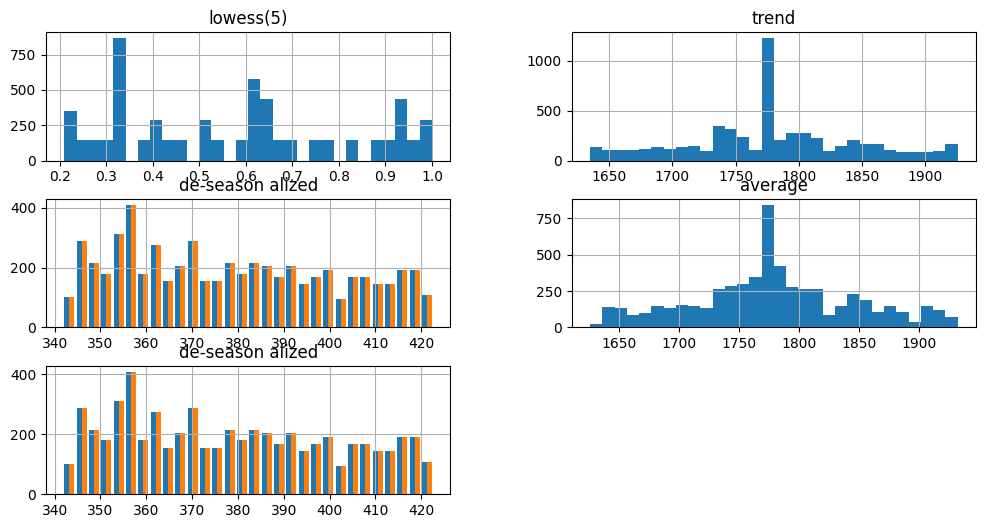

In [18]:
# Resumen descriptivo
print(data.describe())

# Visualización de distribuciones
data[['lowess(5)', 'trend', 'de-season alized', 'average', 'de-season alized']].hist(bins=30, figsize=(12, 6))
plt.show()

#🔹 2. (EDA) ANÁLISIS EXPLORATORIO DE DATOS
📌 Objetivo: Comprender las distribuciones, relaciones entre variables y detectar patrones o problemas en los datos.



##📍 2.1 Análisis de distribución
 - ✔ Histogramas y gráficos de densidad.
 - ✔ Medidas de tendencia central y dispersión (media, mediana, moda, desviación estándar).
 - ✔ Evaluación del sesgo y curtosis.
 - ✔ Análisis de cuartiles y detección de outliers con boxplots

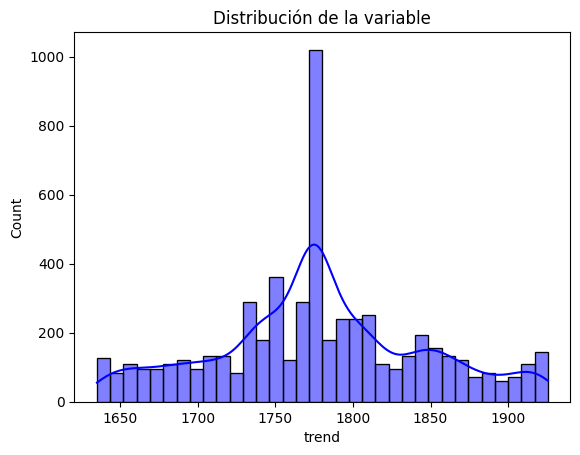

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Histograma y gráfico de densidad
sns.histplot(data['trend'], kde=True, color='blue')
plt.title('Distribución de la variable')
plt.show()



In [20]:
# Medidas de tendencia central
mean_value = data['trend'].mean()   # Media
median_value = data['trend'].median()   # Mediana
mode_value = data['trend'].mode()[0]   # Moda

print(f"Media: {mean_value}")
print(f"Mediana: {median_value}")
print(f"Moda: {mode_value}")

# Medidas de dispersión
range_value = data['trend'].max() - data['trend'].min()   # Rango
std_dev = data['trend'].std()   # Desviación estándar
variance = data['trend'].var()   # Varianza

print(f"Rango: {range_value}")
print(f"Desviación Estándar: {std_dev}")
print(f"Varianza: {variance}")


Media: 1778.0417301750774
Mediana: 1774.66
Moda: 1735.31
Rango: 290.65999999999985
Desviación Estándar: 67.33299945429764
Varianza: 4533.732815512446


Análisis de cuartiles y rango intercuartil (IQR) para detectar outliers

Es una técnica útil para: Identificar outliers, Entender la distribución de los datos, Limpiar los datos antes de aplicar modelos o descomposiciones.

In [21]:
# Calcular los cuartiles
q1 = data['trend'].quantile(0.25)   # Primer cuartil (Q1)
q3 = data['trend'].quantile(0.75)   # Tercer cuartil (Q3)
iqr = q3 - q1   # Rango intercuartil

# Definir límites para detección de outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"IQR: {iqr}")
print(f"Límite inferior para outliers: {lower_bound}")
print(f"Límite superior para outliers: {upper_bound}")


Q1: 1736.61
Q3: 1815.35
IQR: 78.74000000000001
Límite inferior para outliers: 1618.5
Límite superior para outliers: 1933.46


 Detección de outliers con boxplots

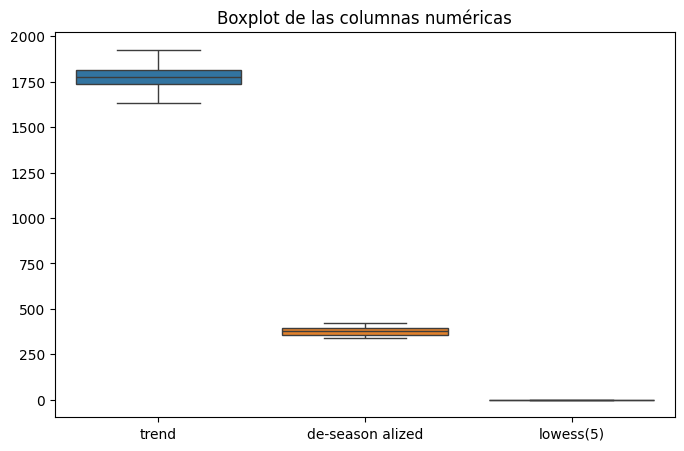

In [22]:

# Revisar si hay valores atípicos en las columnas usando un gráfico de caja (boxplot)
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(data=data[['trend', 'de-season alized', 'lowess(5)']])
plt.title('Boxplot de las columnas numéricas')
plt.show()

##  📍 2.2 Análisis de correlaciones y relaciones entre variables (EDA)
 - ✔ Correlación de Pearson para entender relaciones lineales.
 - ✔ Heatmap de correlación.
 - ✔ Scatter plots entre variables clave (CO₂, metano, temperatura).

La correlación de Pearson mide la relación lineal entre dos variables. Los valores están en el rango de -1 a 1:

1: Correlación positiva perfecta (aumentan juntas). -1: Correlación negativa perfecta (una sube mientras la otra baja). 0: No hay relación lineal.

Resultados de las correlaciones: Correlación CO₂-Temperatura: 0.94

Existe una relación lineal positiva muy fuerte entre las concentraciones de dióxido de carbono (ajustadas sin estacionalidad) y las temperaturas globales. Esto implica que, a medida que las concentraciones de CO₂ aumentan, también lo hace la temperatura global. Este resultado respalda la hipótesis ampliamente estudiada de que el dióxido de carbono es un factor clave en el calentamiento global. Correlación Metano-Temperatura: 0.92

También hay una relación lineal positiva muy fuerte entre las concentraciones de metano (tendencia suavizada) y las temperaturas globales. Aunque ligeramente inferior a la correlación del CO₂, el metano también tiene un impacto considerable en los aumentos de temperatura. Conclusión general: Ambas correlaciones indican que tanto el dióxido de carbono como el metano están fuertemente asociados con el aumento de las temperaturas globales. Sin embargo, el CO₂ muestra una correlación ligeramente más alta, lo que sugiere que podría tener un impacto más directo o significativo en el calentamiento global a largo plazo.

Estos resultados están en línea con estudios científicos que posicionan al CO₂ como el principal gas de efecto invernadero debido a su mayor concentración en la atmósfera, pero también destacan la importancia del metano, que tiene un potencial de calentamiento global mucho mayor por molécula (aunque en menores cantidades).

¿Qué podríamos agregar a la interpretación? Impacto a largo plazo:

El CO₂ tiene un tiempo de vida mucho más largo en la atmósfera (siglos), mientras que el metano se degrada en décadas. Esto podría explicar su correlación ligeramente mayor con la temperatura a lo largo de los años. Factores complementarios:

Aunque las correlaciones son altas, es importante considerar que hay otros factores (naturales y humanos) que también afectan las temperaturas globales, como aerosoles, radiación solar y cambios en el uso del suelo. Acciones futuras:

Reducir las emisiones de ambos gases es crucial para mitigar el cambio climático, pero priorizar la reducción de CO₂ puede tener un impacto más significativo a largo plazo.

In [23]:
print(temperatura.shape)  # Tamaño de 'temperatura'
print(data.shape)         # Tamaño de 'data'

# Verificar si hay valores nulos después del merge
print(temperatura['no_smoothing'].isnull().sum())
print(data['de-season alized'].isnull().sum())

from scipy.stats import pearsonr
corr_co2_temp, _ = pearsonr(data['no_smoothing'], data['de-season alized'])
corr_ch4_temp, _ = pearsonr(data['no_smoothing'], data['trend'])

print(f"Correlación CO₂-Temperatura: {corr_co2_temp}")
print(f"Correlación Metano-Temperatura: {corr_ch4_temp}")



(141, 3)
(5826, 14)
0
0
Correlación CO₂-Temperatura: 0.9414696322307785
Correlación Metano-Temperatura: 0.9172235040391314


Matriz de correlación:
                      year     month   decimal   average  average_unc  \
year              1.000000 -0.017083  0.999697  0.969842    -0.110206   
month            -0.017083  1.000000  0.007538  0.021957    -0.028005   
decimal           0.999697  0.007538  1.000000  0.970497    -0.110909   
average           0.969842  0.021957  0.970497  1.000000    -0.158952   
average_unc      -0.110206 -0.028005 -0.110909 -0.158952     1.000000   
trend             0.972509  0.009778  0.972864  0.997736    -0.150129   
trend_unc        -0.140175  0.035381 -0.139320 -0.178633     0.467720   
monthly average   0.991835 -0.015186  0.991578  0.964256    -0.085896   
de-season alized  0.994746 -0.015238  0.994487  0.967088    -0.086167   
days              0.306552 -0.010820  0.306322  0.363128    -0.178303   
st. dev of days   0.162837 -0.000693  0.162839  0.175234    -0.064621   
monthdiox         0.002849 -0.001411  0.002815  0.003441    -0.003844   
no_smoothing      0.935429 -

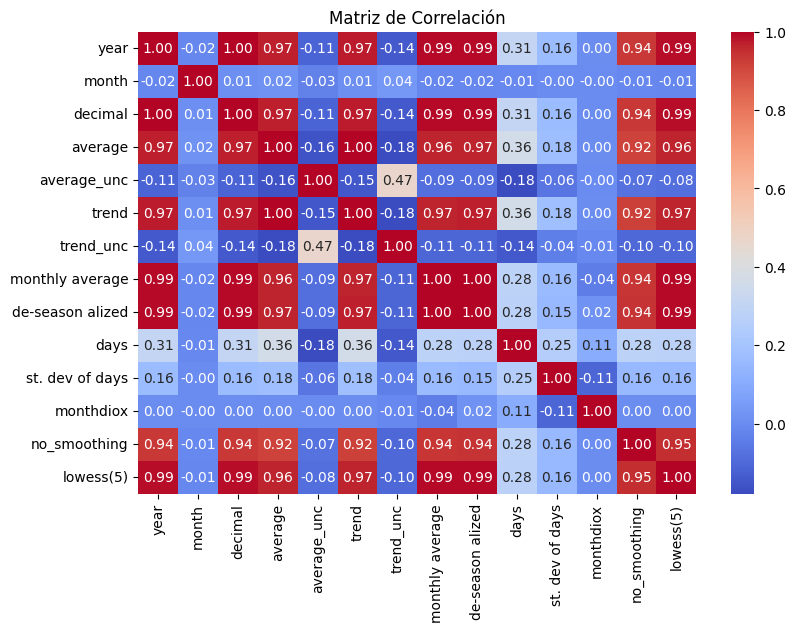

In [24]:
# Matriz de correlación
correlation_matrix = data.corr()
print("Matriz de correlación:")
print(correlation_matrix)

# Visualización de la correlación
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

Scatter Plot (Pairplot) Interpretación:

Si los puntos en un gráfico de dispersión siguen una línea recta, la relación es lineal.
Si forman una curva, la relación es no lineal.
Si están dispersos sin patrón claro, no hay correlación.

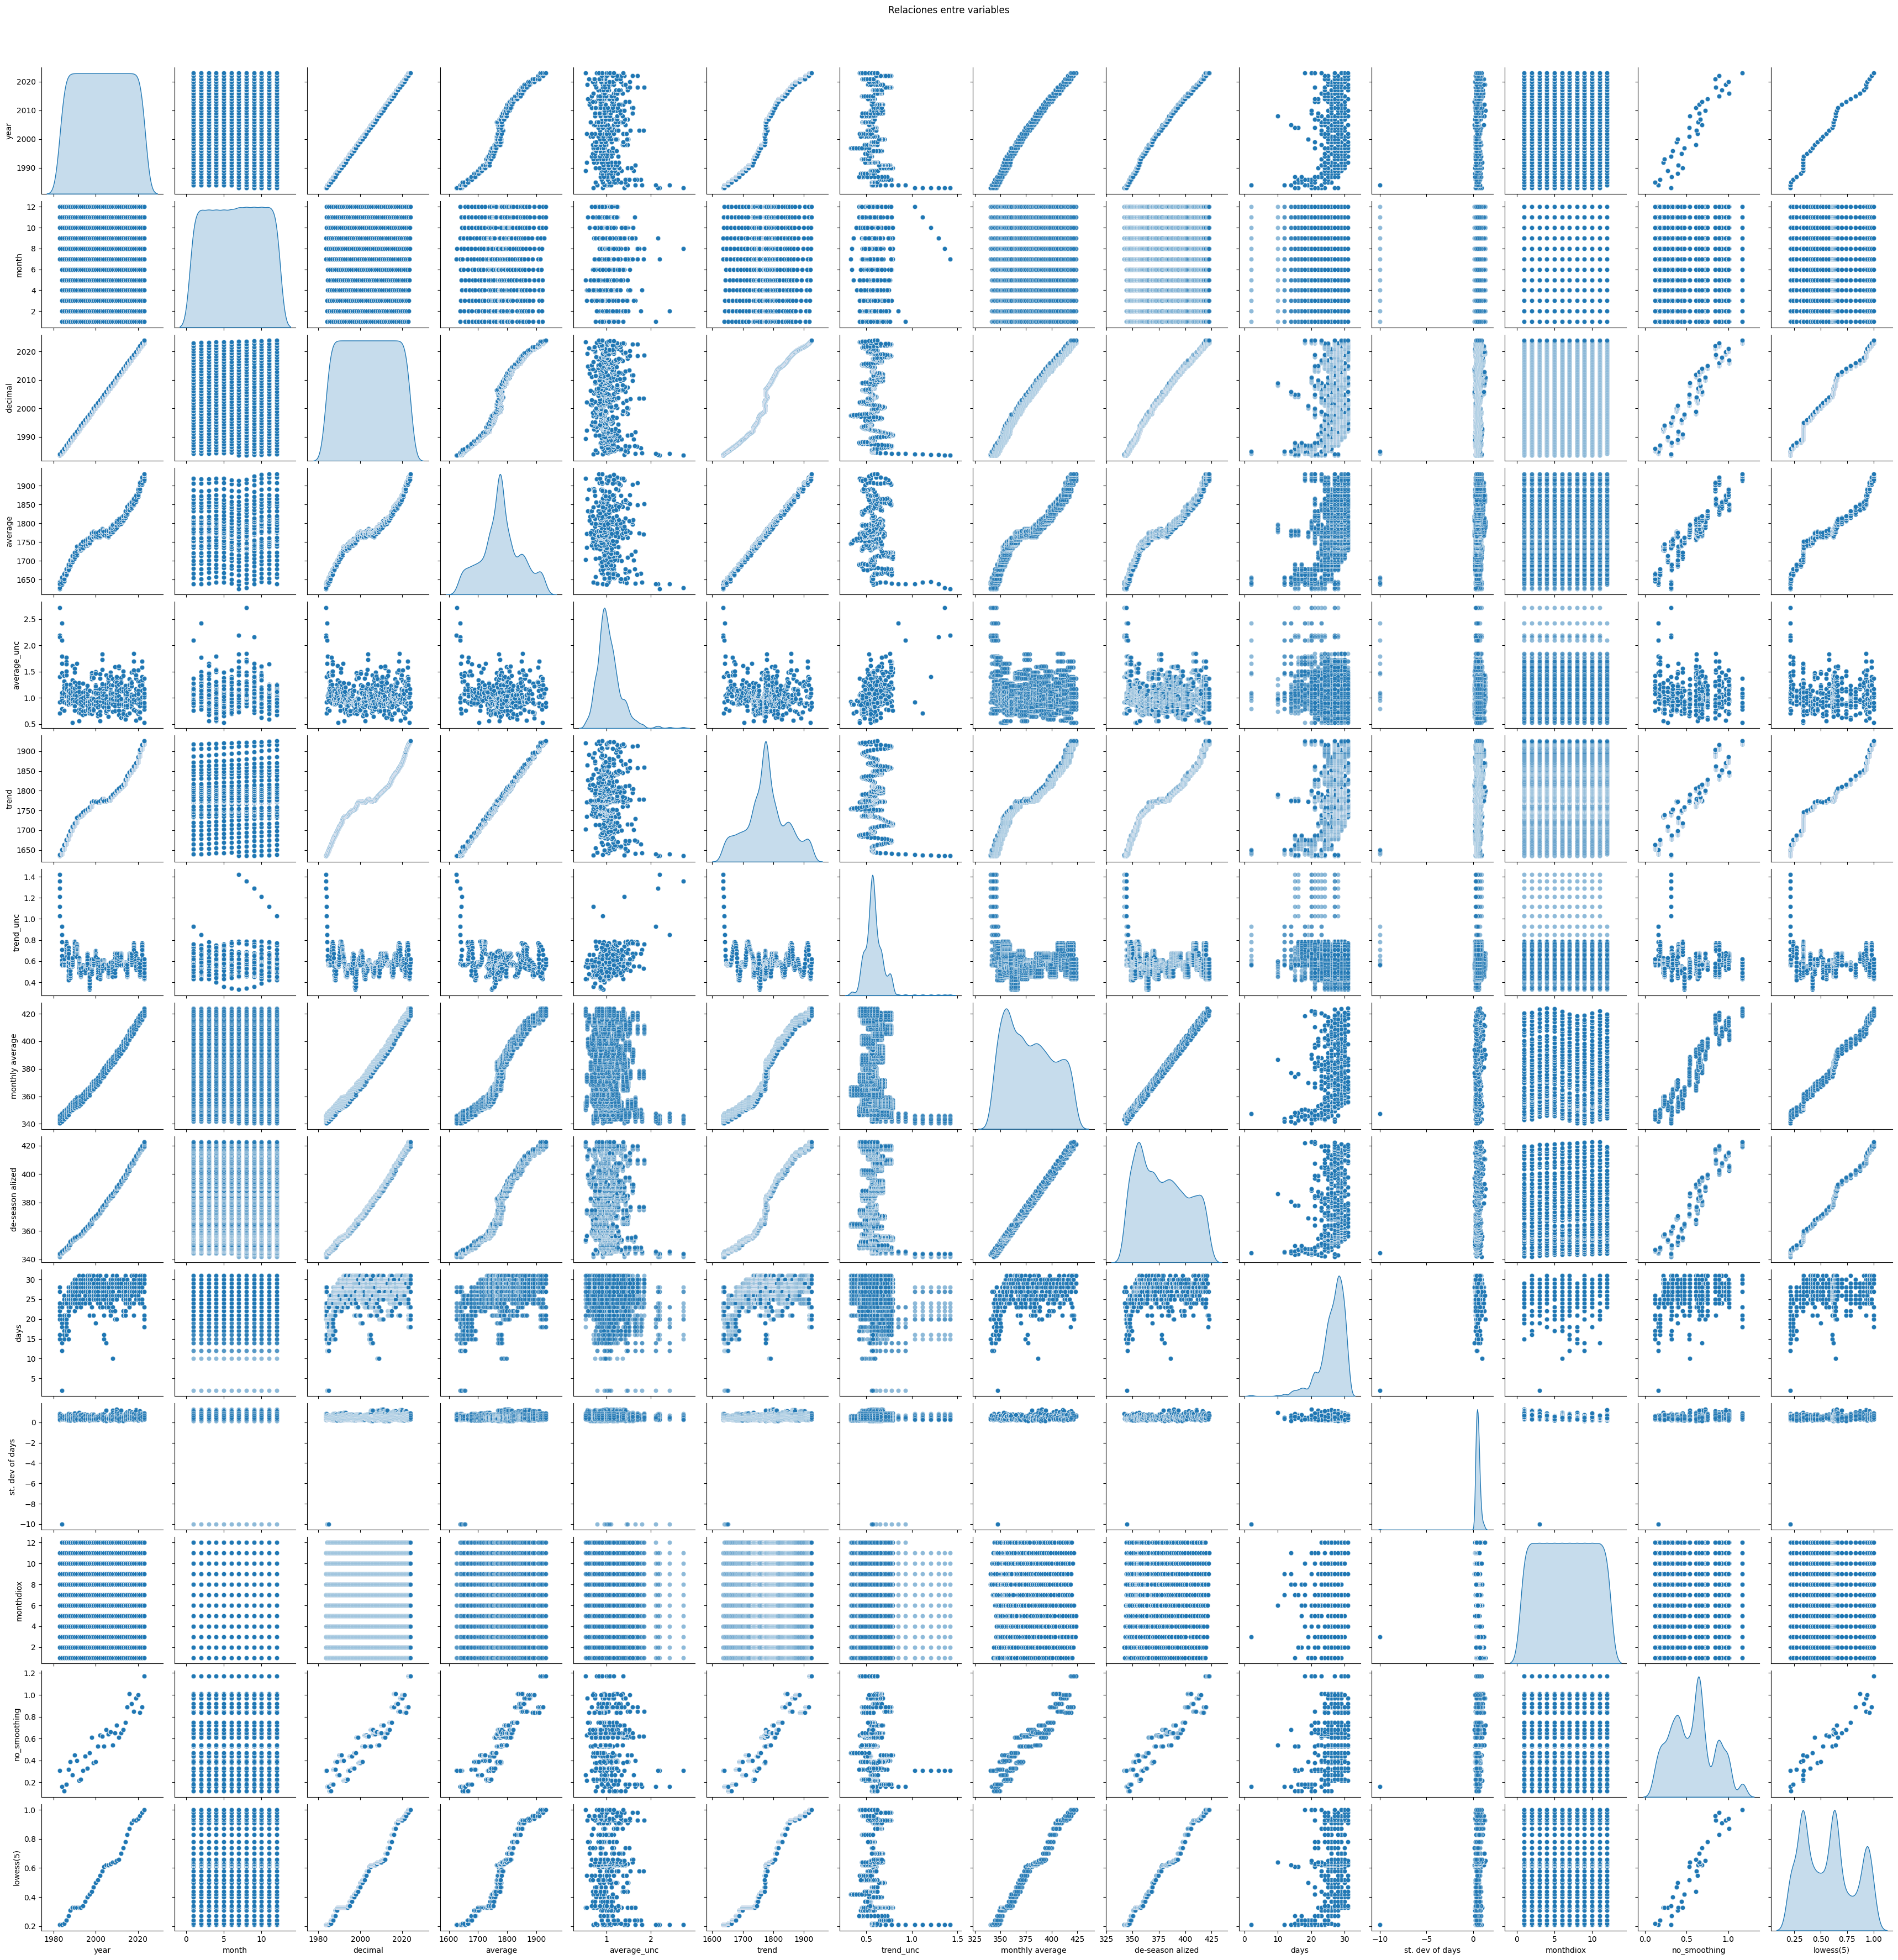

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un scatter plot para ver las relaciones entre variables
sns.pairplot(data, diag_kind="kde", plot_kws={'alpha':0.5})
plt.suptitle("Relaciones entre variables", y=1.02)
plt.show()

Correlación busca relaciones entre variables (Ej: ¿CO₂ y temperatura están correlacionados?).

 El pairplot es una herramienta visual poderosa para identificar patrones y relaciones entre variables antes de aplicar modelos estadísticos o de machine learning. 🚀

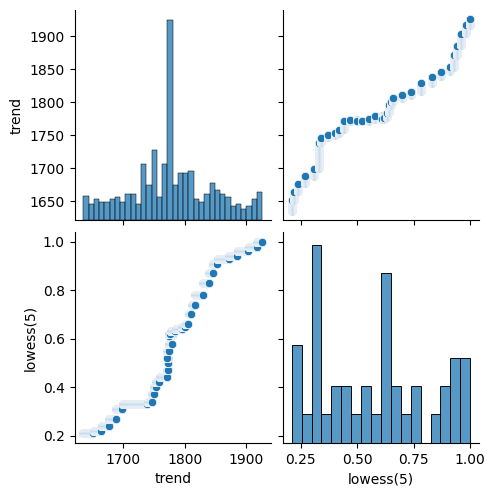

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un pairplot con las variables de interés
sns.pairplot(data[['trend',  'lowess(5)']])
plt.show()


#🔹 3. LIMPIEZA Y PREPROCESAMIENTO
📌 Objetivo: Garantizar datos de calidad antes del análisis de series temporales.
 - ✔ Manejo de valores nulos (relleno con media/mediana/interpolación).
 - ✔ Corrección de outliers (winsorización, reemplazo por cuartiles).
 - ✔ Conversión de tipos de datos (datetime, categorías, numéricos).

*Identificación* de valores nulos y duplicados.
Las filas con valores nulos se eliminaron para garantizar la integridad del análisis.

In [31]:
print(data.isnull().sum())

print(f"Filas duplicadas: {data.duplicated().sum()}")
data.drop_duplicates(inplace=True) #se eliminan si las hay


year                0
month               0
decimal             0
average             0
average_unc         0
trend               0
trend_unc           0
monthly average     0
de-season alized    0
days                0
st. dev of days     0
monthdiox           0
no_smoothing        0
lowess(5)           0
dtype: int64
Filas duplicadas: 0


In [32]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# 1️⃣ Manejo de valores nulos
print("\n🔹 Valores nulos antes del tratamiento:")
print(data.isnull().sum())

# Opción 1: Eliminar columnas con demasiados valores nulos (umbral del 40% como ejemplo)
threshold = 0.4 * len(data)  # Si más del 40% de la columna tiene NaN, se elimina
data = data.dropna(thresh=threshold, axis=1)

# Opción 2: Eliminar filas con valores nulos
data = data.dropna()

# Opción 3: Rellenar valores nulos con la media o mediana
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].median(), inplace=True)  # Cambiar a .mean() si prefieres la media

# 2️⃣ Corrección de outliers (Winsorización o reemplazo basado en cuartiles)
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Winsorización (ajusta valores extremos a los percentiles 5 y 95)
    data[col] = np.clip(data[col], lower_bound, upper_bound)



# Convertir variables categóricas a tipo "category"
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype('category')

#

print("\n✅ Limpieza de datos completada.")



🔹 Valores nulos antes del tratamiento:
year                0
month               0
decimal             0
average             0
average_unc         0
trend               0
trend_unc           0
monthly average     0
de-season alized    0
days                0
st. dev of days     0
monthdiox           0
no_smoothing        0
lowess(5)           0
dtype: int64

✅ Limpieza de datos completada.


<ipython-input-32-2b2060917192>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)  # Cambiar a .mean() si prefieres la media


In [33]:
#denuevo los outliers para ver el resultado
import numpy as np

# Contar outliers antes de la Winsorización
outliers_before = {}
outliers_after = {}

for col in data.select_dtypes(include=['float64', 'int64']).columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Contar outliers antes
    outliers_before[col] = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()

    # Aplicar Winsorización
    data[col] = np.clip(data[col], lower_bound, upper_bound)

    # Contar outliers después
    outliers_after[col] = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()

# Mostrar el número de outliers antes y después
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    print(f"{col}: {outliers_before[col]} outliers antes -> {outliers_after[col]} outliers después")


year: 0 outliers antes -> 0 outliers después
month: 0 outliers antes -> 0 outliers después
decimal: 0 outliers antes -> 0 outliers después
average: 0 outliers antes -> 0 outliers después
average_unc: 0 outliers antes -> 0 outliers después
trend: 0 outliers antes -> 0 outliers después
trend_unc: 0 outliers antes -> 0 outliers después
monthly average: 0 outliers antes -> 0 outliers después
de-season alized: 0 outliers antes -> 0 outliers después
days: 0 outliers antes -> 0 outliers después
st. dev of days: 0 outliers antes -> 0 outliers después
monthdiox: 0 outliers antes -> 0 outliers después
no_smoothing: 0 outliers antes -> 0 outliers después
lowess(5): 0 outliers antes -> 0 outliers después


In [34]:
# 3️⃣ Conversión de tipos de datos
for col in data.columns:
    if data[col].dtype == 'object':
        try:
            data[col] = pd.to_datetime(data[col])  # Intentar convertir en fecha
        except:
            pass  # Si falla, se mantiene como texto

# 🔹 4. ANÁLISIS DE SERIES TEMPORALES
📌 Objetivo: Identificar tendencias, estacionalidad y anomalías.


## 📍 4.1 Visualización y exploración tatrones estacionales y ciclos anuales.


- Explorar cómo han cambiado las concentraciones de gases y las temperaturas a lo largo de los años.

El promedio (media) proporciona una visión general del comportamiento de la variable.

Variables:
1. average: Promedio mensual de las concentraciones de metano (en partes por millón - ppm) para ese año y mes.
2. monthly average: Promedio mensual de concentraciones de dióxido de carbono (ppm).



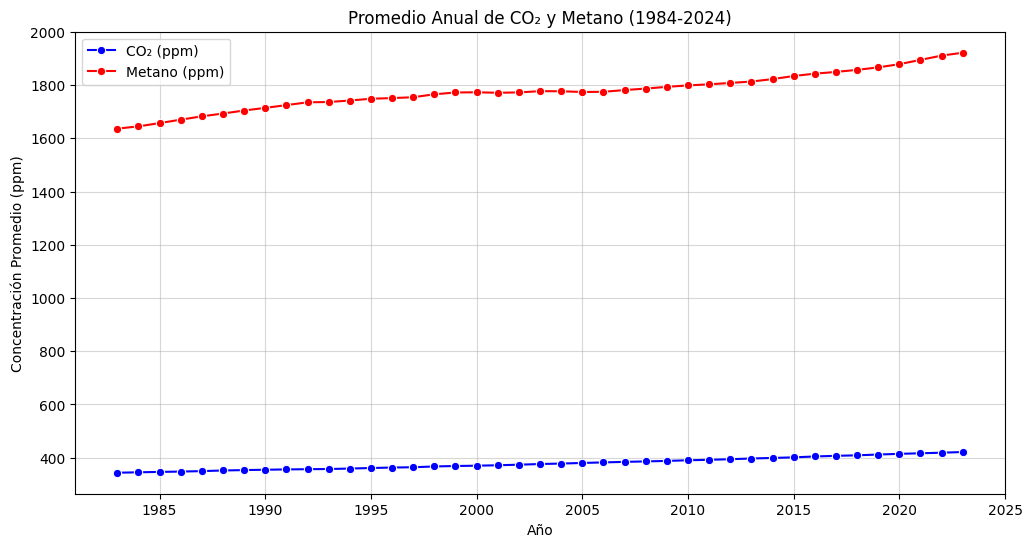

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

#Promedio mensual montly average de C02 Y Average de Metano
# Calcular la media anual de cada gas
annual_avg = data.groupby('year')[['monthly average', 'average']].mean().reset_index()

# Graficar la tendencia anual del CO₂
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='monthly average', data=annual_avg, color='blue', marker='o', label='CO₂ (ppm)')
sns.lineplot(x='year', y='average', data=annual_avg, color='red', marker='o', label='Metano (ppm)')
plt.xlabel('Año')
plt.ylabel('Concentración Promedio (ppm)')
plt.title('Promedio Anual de CO₂ y Metano (1984-2024)')
plt.legend()
plt.grid(alpha=0.5)
plt.show()


- Tendencias de Metano y c02 a lo largo del tiempo
Variables

 La tendencia muestra la dirección general de los datos a lo largo del tiempo.

1. trend: Tendencia estimada de las concentraciones de metano después de eliminar los efectos estacionales.
2. de-season alized: Concentraciones ajustadas para eliminar efectos estacionales.


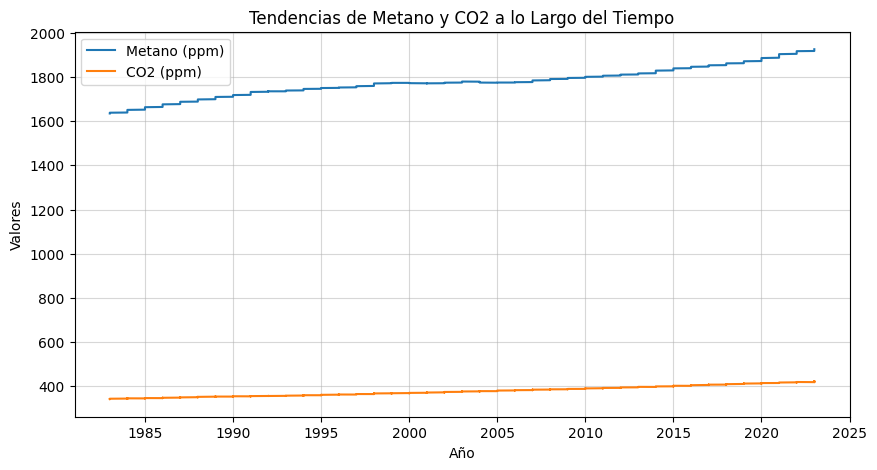

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(data['year'], data['trend'], label='Metano (ppm)')
plt.plot(data['year'], data['de-season alized'], label='CO2 (ppm)')
plt.xlabel('Año')
plt.ylabel('Valores')
plt.title('Tendencias de Metano y CO2 a lo Largo del Tiempo')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

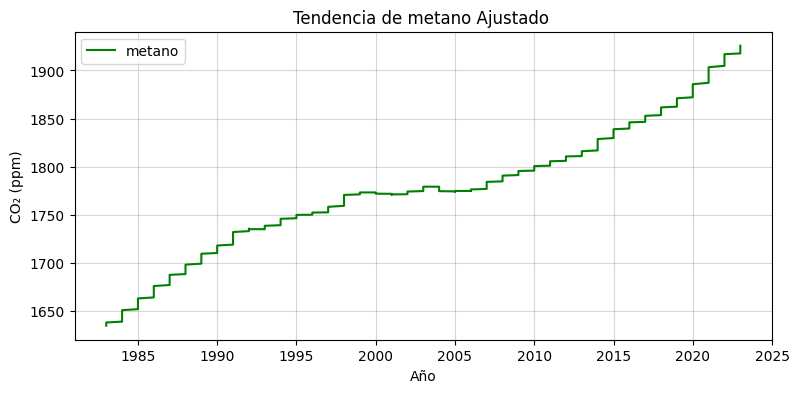

In [37]:
plt.figure(figsize=(9, 4))
plt.plot(data['year'], data['trend'], label='metano', color='green')
plt.title('Tendencia de metano Ajustado ')
plt.xlabel('Año')
plt.ylabel('CO₂ (ppm)')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

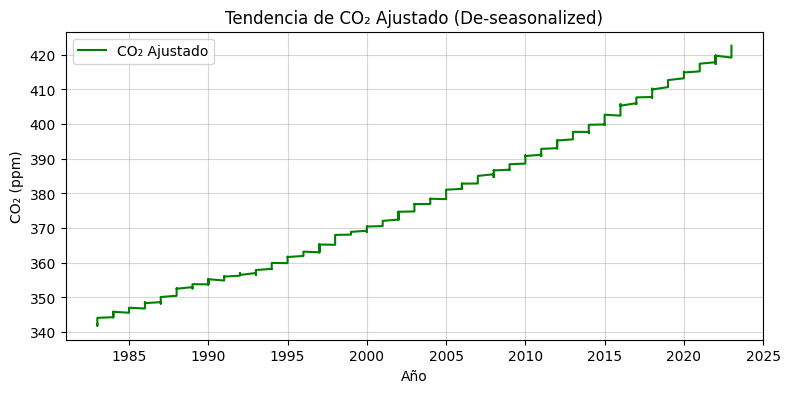

In [38]:
plt.figure(figsize=(9, 4))
plt.plot(data['year'], data['de-season alized'], label='CO₂ Ajustado', color='green')
plt.title('Tendencia de CO₂ Ajustado (De-seasonalized)')
plt.xlabel('Año')
plt.ylabel('CO₂ (ppm)')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

Explicación de los gráficos y diferencias entre ellos

Tendencia de Metano Ajustado

Este gráfico muestra la tendencia del metano en ppm a lo largo de los años.
La variable trend utilizada en la gráfica sugiere que es un valor suavizado o ajustado de los datos de metano.
Se observa un incremento progresivo con algunas mesetas entre 2000 y 2010, pero luego sigue aumentando hasta 2024.
Posiblemente, los valores fueron ajustados mediante un método de suavizado o eliminación de estacionalidad.
Tendencia de CO₂ Ajustado (De-seasonalized)

Aquí se muestra la tendencia del CO₂ en ppm sin la variabilidad estacional.
Se nota un crecimiento sostenido en la concentración de CO₂ desde 1983 hasta 2024.
Al eliminar la estacionalidad, se observa un patrón más claro y continuo de aumento.
Tendencias de Metano, CO₂ y Temperatura Global a lo Largo del Tiempo

En este gráfico, se comparan las tendencias de metano, CO₂ y los años.
La escala de valores del metano es mucho mayor que la del CO₂, lo que hace que visualmente el CO₂ parezca menos pronunciado.
A diferencia del gráfico individual de CO₂ o metano, este muestra las tendencias de varias variables juntas, lo que puede afectar la percepción de sus crecimientos individuales.


### 🔹 Análisis de variabilidad (Desviación estándar, varianza, IQR)

Desviación estándar: Cuantifica la dispersión de los valores respecto a la media.
Varianza: Relacionada con la desviación estándar, pero elevada al cuadrado.
Rango intercuartil (IQR): Para detectar valores atípicos y entender la distribución.
De esta forma, primero entiendes la tendencia central y luego cómo se dispersan los datos a su alrededor. 🚀


1. La desviación estándar ayuda a cuantificar la variabilidad de los datos alrededor de la tendencia o el promedio.
 En este caso, nos indicará qué tan dispersos son los valores de CO₂ y metano año a año.

📌 Interpretación:
CO₂: 22.90 ppm → Las concentraciones de CO₂ tienden a fluctuar, en promedio, ±22.90 ppm con respecto a su media.
Metano: 67.53 ppm → Las concentraciones de metano tienen una variabilidad mayor, oscilando ±67.53 ppm en torno a su media.
🔹 Comparación:

El metano (67.53 ppm) tiene más variabilidad que el CO₂ (22.90 ppm), lo que indica que sus valores presentan mayores fluctuaciones a lo largo del tiempo.
Puede sugerir que el metano está más influenciado por factores externos o tiene picos más marcados que el CO₂.

In [39]:
import numpy as np

# Calcular desviación estándar para CO₂ y Metano
std_co2 = np.std(data['monthly average'])  # Ajusta según el nombre real de la columna de CO₂
std_metano = np.std(data['average'])  # Ajusta según el nombre real de la columna de Metano

print(f"Desviación Estándar de CO₂: {std_co2:.2f} ppm")
print(f"Desviación Estándar de Metano: {std_metano:.2f} ppm")


Desviación Estándar de CO₂: 22.90 ppm
Desviación Estándar de Metano: 67.53 ppm


##📍 4.2 Cuantificación de variabilidad y crecimiento año tras año
 ✔ Cálculo de tasas de crecimiento (diff()).
 ✔ Comparación entre meses/años.

Cuantificar año tras año

Para cuantificar el crecimiento año tras año se calcula la diferencia entre valores consecutivos en la serie temporal de CO₂ y metano.

In [40]:
import pandas as pd

#  las columnas 'year', 'co2' y 'methane'
data['dioxido_diff'] = data['monthly average'].diff()  # Cambio absoluto año tras año para CO₂
data['metano_diff'] = data['average'].diff()  # Cambio absoluto año tras año para metano

# Cambio porcentual año tras año
data['dioxido_growth'] = data['monthly average'].pct_change() * 100  # En porcentaje
data['metano_growth'] = data['average'].pct_change() * 100  # En porcentaje

# Mostrar los primeros valores calculados
print(data[['year', 'dioxido_diff', 'dioxido_growth', 'metano_diff', 'metano_growth']].dropna())

      year  dioxido_diff  dioxido_growth  metano_diff  metano_growth
1     1983          0.59        0.172122          0.0            0.0
2     1983          2.03        0.591199          0.0            0.0
3     1983          0.74        0.214244          0.0            0.0
4     1983         -0.38       -0.109782          0.0            0.0
5     1983         -1.44       -0.416474          0.0            0.0
...    ...           ...             ...          ...            ...
5821  2023         -2.15       -0.509684          0.0            0.0
5822  2023         -1.18       -0.281167          0.0            0.0
5823  2023          0.32        0.076464          0.0            0.0
5824  2023          1.64        0.391576          0.0            0.0
5825  2023          1.40        0.332969          0.0            0.0

[5825 rows x 5 columns]


Este análisis te permite:

✔ Medir la variabilidad temporal del dióxido de carbono (CO₂) y el metano (CH₄), viendo cuánto aumentan o disminuyen año tras año.
✔ Detectar tendencias de crecimiento o reducción en la concentración de estos gases.
✔ Identificar patrones inusuales o años donde hubo cambios bruscos.
✔ Comparar el crecimiento relativo de ambos gases mediante el cambio porcentual.

En términos de series temporales, esto ayuda a comprender si hay un patrón de crecimiento sostenido, aceleraciones o posibles fluctuaciones estacionales.

2️⃣ ¿Qué indican los resultados?
📌 CO₂:

Los valores de dioxido_diff muestran que el CO₂ varía año tras año, con aumentos y disminuciones.
El dioxido_growth (crecimiento porcentual) oscila entre valores positivos y negativos, lo que indica que la tasa de crecimiento del CO₂ no es uniforme.
Hay valores negativos, lo que sugiere que en ciertos momentos hubo descensos en la concentración de CO₂.
📌 Metano:

La columna metano_diff es casi toda 0, lo que sugiere que el metano no varía significativamente año tras año en este dataset.
El metano_growth también es 0 en todos los registros, indicando que el metano no muestra variaciones apreciables en este análisis.
🔎 Posibles interpretaciones:
✔ El CO₂ presenta una tendencia de crecimiento con fluctuaciones, lo que podría indicar factores estacionales, eventos climáticos o cambios en la actividad humana.
✔ El metano, en cambio, parece mantenerse estable en los valores registrados, lo que podría deberse a una medición menos frecuente o a un crecimiento más uniforme.

Vamos a graficar la variabilidad anual de CO₂ y metano. Haremos dos gráficos:

1️⃣ Diferencias anuales (diff): Cuánto cambió la concentración de cada gas de un año a otro.

2️⃣ Crecimiento relativo (growth): Cambio porcentual año tras año.


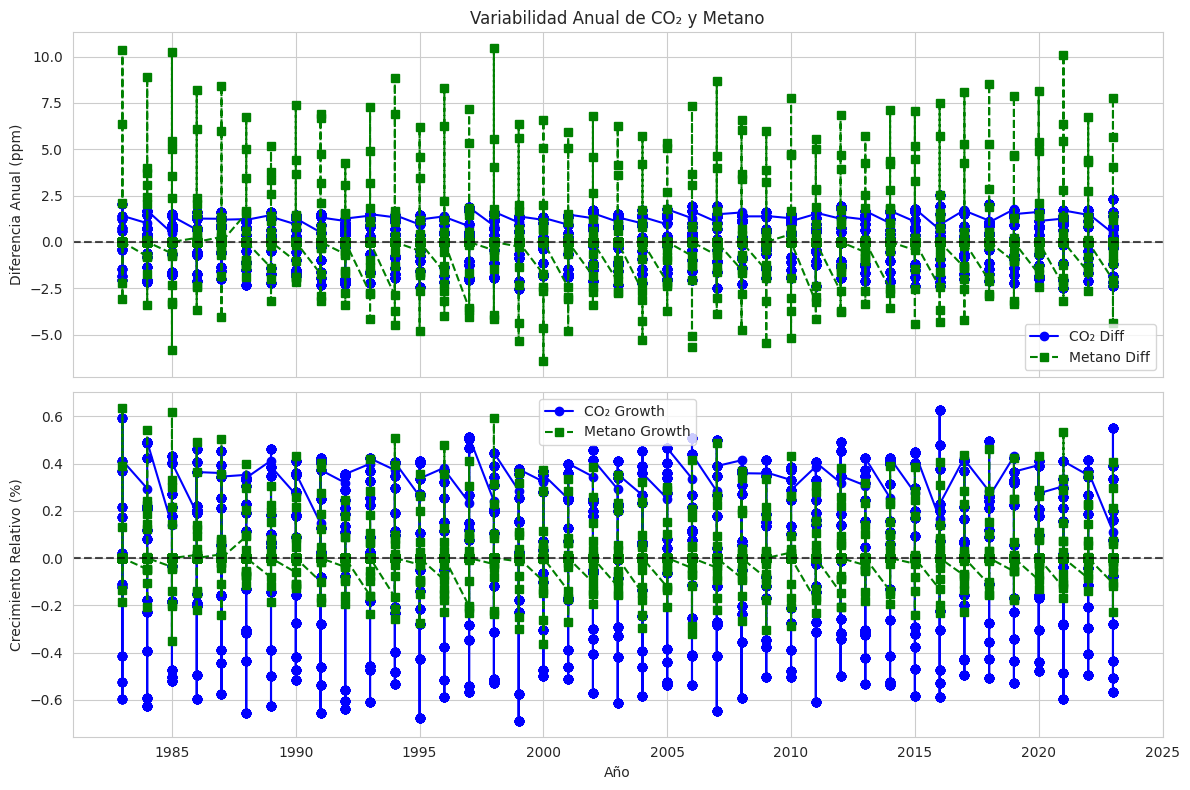

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del estilo
sns.set_style("whitegrid")

# Crear la figura y los ejes
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Gráfico de diferencias anuales
axes[0].plot(data['year'], data['dioxido_diff'], label='CO₂ Diff', color='blue', marker='o', linestyle='-')
axes[0].plot(data['year'], data['metano_diff'], label='Metano Diff', color='green', marker='s', linestyle='--')
axes[0].set_ylabel('Diferencia Anual (ppm)')
axes[0].set_title('Variabilidad Anual de CO₂ y Metano')
axes[0].legend()
axes[0].axhline(0, color='black', linestyle='--', alpha=0.7)

# Gráfico de crecimiento relativo
axes[1].plot(data['year'], data['dioxido_growth'], label='CO₂ Growth', color='blue', marker='o', linestyle='-')
axes[1].plot(data['year'], data['metano_growth'], label='Metano Growth', color='green', marker='s', linestyle='--')
axes[1].set_ylabel('Crecimiento Relativo (%)')
axes[1].set_xlabel('Año')
axes[1].legend()
axes[1].axhline(0, color='black', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



📊 Gráfico superior (Diferencia Anual, diff)

CO₂ (azul): Muestra fluctuaciones moderadas en la variación anual, con valores mayormente positivos. Esto sugiere que el CO₂ ha aumentado cada año, aunque con pequeñas oscilaciones.
Metano (verde): Tiene variaciones más extremas, con picos y valles más pronunciados. Esto indica una variabilidad anual mayor que la del CO₂.

📈 Gráfico inferior (Crecimiento Relativo, growth)

CO₂ (azul): Se mantiene en valores positivos en la mayoría de los años, indicando un crecimiento constante en su concentración. Sin embargo, hay algunos años con caídas leves.
Metano (verde): Su crecimiento es más errático, con años de crecimiento y otros de reducción.


Conclusión basada en el gráfico
🔹 El CO₂ muestra una tendencia de crecimiento sostenido, con pequeñas oscilaciones en la variación anual. Su crecimiento relativo rara vez cae por debajo de 0, lo que indica que cada año hay más CO₂ en la atmósfera.

🔹 El metano es más volátil, con variaciones grandes en diff, lo que sugiere que su concentración fluctúa más de un año a otro. Su crecimiento relativo también tiene valores negativos en varios años, lo que significa que hay períodos donde su concentración ha disminuido.

🔹 El comportamiento del metano podría estar más influenciado por factores estacionales o eventos específicos (ej. cambios en emisiones agrícolas o industriales).

3️⃣ ¿Esto lo hicimos a partir de la cuantificación?
✅ Sí.

Los valores dioxido_diff y metano_diff nos permitieron ver cómo cambian las concentraciones cada año.
Los valores dioxido_growth y metano_growth nos dieron la tasa de crecimiento, permitiendo detectar tendencias generales.
Este análisis es fundamental en series temporales, porque ayuda a determinar si hay tendencias de crecimiento o si el comportamiento es más estacional (fluctuante sin una dirección clara).

📌 Siguientes pasos:
Si queremos ver si hay un patrón estacional real, podríamos hacer un análisis más profundo con:

Promedios mensuales de CO₂ y metano para ver ciclos dentro de cada año.
Descomposición de series temporales para separar tendencia y estacionalidad.
Autocorrelación para ver si hay repeticiones en ciertos períodos.

### Análisis Estacional metano y c02

 Análisis de Variabilidad Estacional (Mensual)
Este análisis busca identificar patrones que se repiten anualmente en cada mes. Aquí se pueden responder preguntas como:

¿Existen meses en los que el CO₂ y el Metano son consistentemente más altos o bajos a lo largo de los años?
¿Los picos o valles de concentración se repiten cada año en los mismos meses?
¿Cómo se comporta la variabilidad mensual de cada gas?
🔹 Visualización recomendada: Gráficos de caja (boxplots) para mostrar la distribución mensual de cada gas a lo largo de los años.


Usamos tendencia de los datos de c02 y metano

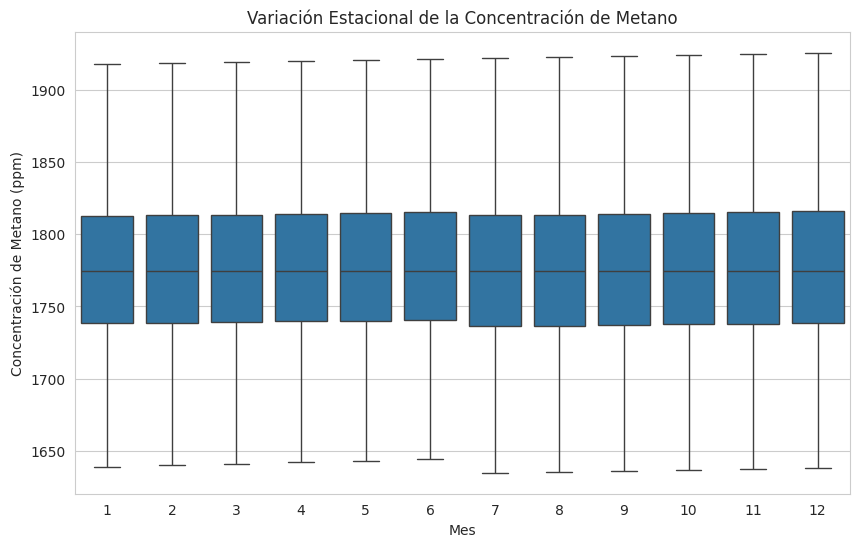

In [42]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='trend', data=data)
plt.xlabel('Mes')
plt.ylabel('Concentración de Metano (ppm)')
plt.title('Variación Estacional de la Concentración de Metano')
plt.show()

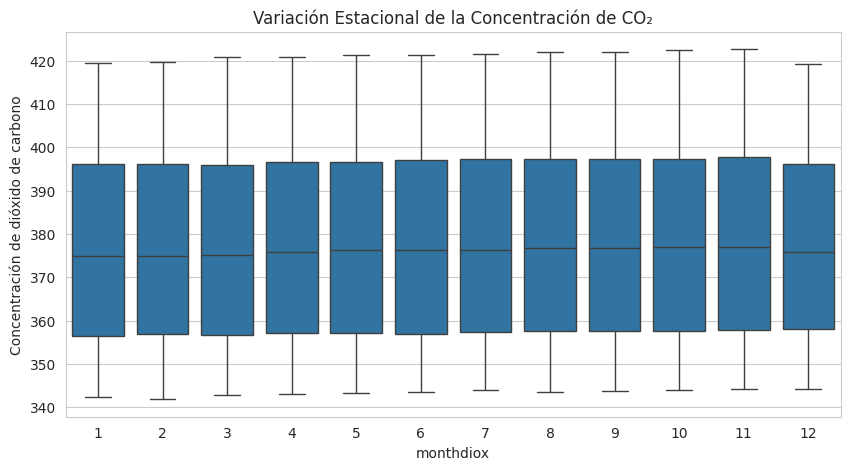

In [43]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='monthdiox', y='de-season alized', data=data)
plt.ylabel('Concentración de dióxido de carbono')
plt.title('Variación Estacional de la Concentración de CO₂')
plt.show()

La variabilidad mensual de la concentración de metano y dióxido de carbono: Cada caja muestra la distribución de los datos mensuales con los siguientes elementos:

Mediana (línea en el centro de la caja): Representa el valor central de la distribución mensual.
Rango intercuartílico (caja): Muestra la dispersión de los valores entre el primer y el tercer cuartil (Q1 y Q3).
Bigotes: Indican la extensión de los datos sin considerar valores atípicos.
Valores atípicos (si los hay, como puntos fuera de los bigotes): Representan mediciones inusuales o desviaciones significativas.
Conclusión de los gráficos
Variabilidad estacional del metano:

La concentración mensual de metano parece mantener una distribución bastante estable a lo largo del año.
No hay cambios estacionales abruptos en la mediana ni en la dispersión de los datos, lo que indica que el metano no tiene una fuerte estacionalidad mensual.
Variabilidad estacional del CO₂:

Similar al metano, la mediana de la concentración de CO₂ es relativamente estable entre los meses.
Sin embargo, hay una ligera variabilidad, con algunas diferencias en la dispersión de los datos en ciertos meses.
¿Qué significa esto para el análisis estacional?
Si la concentración mensual no muestra fluctuaciones significativas a lo largo del año, podría indicar que no hay una fuerte estacionalidad en los datos.
Para confirmar esto, podrías calcular medidas adicionales como la descomposición de series temporales (STL) o aplicar un test de estacionalidad como el de Dickey-Fuller.

#### Comparación de Estacionalidad entre Décadas


✅ Con promedios (de metano y c02)

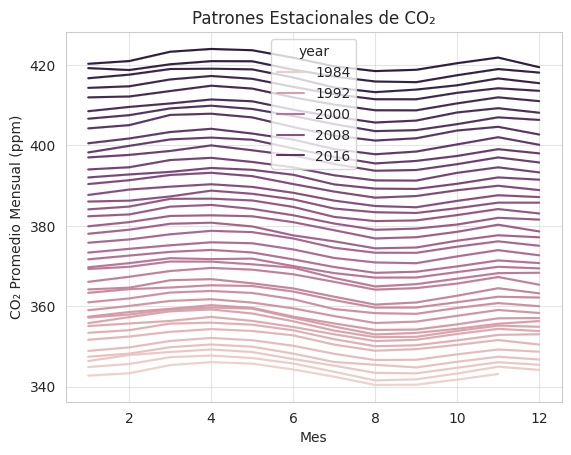

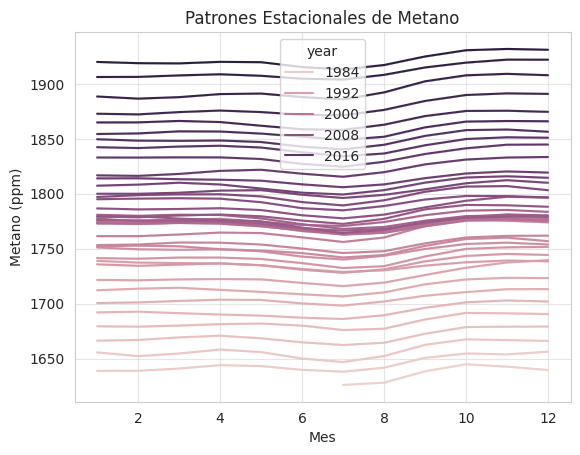

In [45]:
import seaborn as sns
sns.lineplot(x='monthdiox', y='monthly average', hue='year', data=data)
plt.title('Patrones Estacionales de CO₂')
plt.xlabel('Mes')
plt.ylabel('CO₂ Promedio Mensual (ppm)')
plt.grid(alpha=0.5)
plt.show()

sns.lineplot(x='month', y='average', hue='year', data=data)
plt.title('Patrones Estacionales de Metano')
plt.xlabel('Mes')
plt.ylabel('Metano (ppm)')
plt.grid(alpha=0.5)
plt.show()

Patrones Estacionales de CO₂ Se identifica un patrón estacional repetitivo donde los valores de CO₂ fluctúan a lo largo del año, con picos en ciertos meses y descensos en otros. A pesar de la estacionalidad, hay una tendencia general al alza, con los niveles de CO₂ aumentando progresivamente a lo largo de los años. El comportamiento estacional sugiere que el CO₂ tiene ciclos anuales predecibles, pero con una superposición de una tendencia de crecimiento.

Conclusiones del Gráfico de Metano
Se observa un patrón estacional en la concentración de metano a lo largo del año, con ciertas fluctuaciones.
A medida que avanzan las décadas, los niveles de metano han aumentado progresivamente, lo que sugiere una tendencia creciente similar a la del CO₂.
Se nota una variabilidad mensual en los últimos 40 años, con una suave caída a mediados de año y un incremento en los últimos meses.
La diferencia entre las curvas de cada década indica que el metano ha crecido a un ritmo sostenido, aunque la variabilidad en los ciclos estacionales se ha mantenido relativamente estable.


In [46]:
from scipy.stats import zscore

data['z_score'] = zscore(data['average'])
anomalies = data[data['z_score'].abs() > 3]
print("Anomalías detectadas:")
print(anomalies)

Anomalías detectadas:
Empty DataFrame
Columns: [year, month, decimal, average, average_unc, trend, trend_unc, monthly average, de-season alized, days, st. dev of days, monthdiox, no_smoothing, lowess(5), dioxido_diff, metano_diff, dioxido_growth, metano_growth, decade, z_score]
Index: []


 Análisis de los Gráficos de CO₂ y Metano por Década y Mes

✅ Variables de tendencias Para ver la variabilidad de cada mes en diferentes décadas.




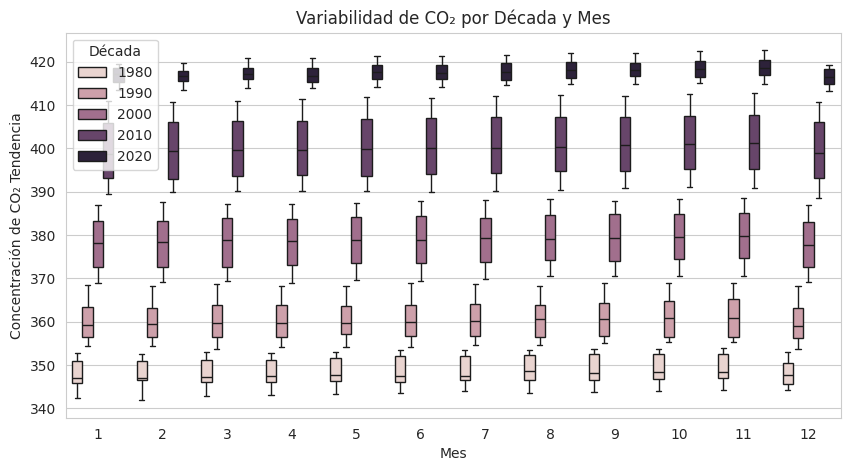

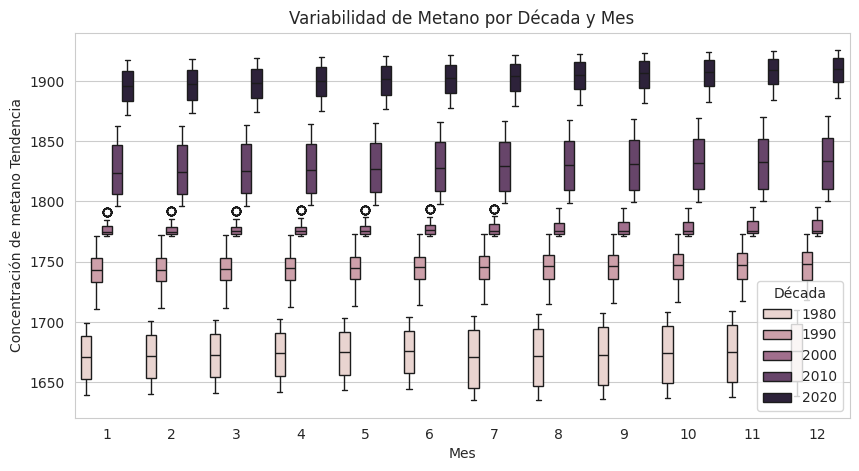

In [88]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='monthdiox', y='de-season alized', hue='decade', data=data)
plt.ylabel('Concentración de CO₂ Tendencia')
plt.xlabel('Mes')
plt.title('Variabilidad de CO₂ por Década y Mes')
plt.legend(title='Década')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='month', y='trend', hue='decade', data=data)
plt.ylabel('Concentración de metano Tendencia')
plt.xlabel('Mes')
plt.title('Variabilidad de Metano por Década y Mes')
plt.legend(title='Década')
plt.show()
#Usa boxplots para ver la dispersión de valores en cada mes dentro de cada década.
# Permite observar si los picos se han desplazado o si la variabilidad ha cambiado.

Ambos gráficos representan la variabilidad estacional del CO₂ y el Metano en diferentes décadas.
La concentración de CO₂ y Metano ha aumentado en cada década, mostrando una tendencia creciente.

Cómo ha evolucionado la concentración de CO₂ y Metano?

Ambas concentraciones han aumentado de manera continua en las últimas décadas.
¿En qué décadas ha habido un mayor aumento?

En CO₂, el incremento es notable entre 2000 y 2020.
En Metano, el aumento más pronunciado se da a partir de 2000.
¿Se han desplazado los picos estacionales?

No se observa un cambio significativo en los picos estacionales, pero la variabilidad mensual se mantiene.
Comparación y conclusión
CO₂: Su concentración ha aumentado constantemente, con una variabilidad estacional que persiste a lo largo de las décadas.
Metano: Ha seguido una tendencia similar, con un fuerte incremento en las últimas dos décadas.
Conclusión general: El aumento sostenido de ambos gases indica un claro impacto ambiental, reflejando cambios en la emisión y acumulación atmosférica.

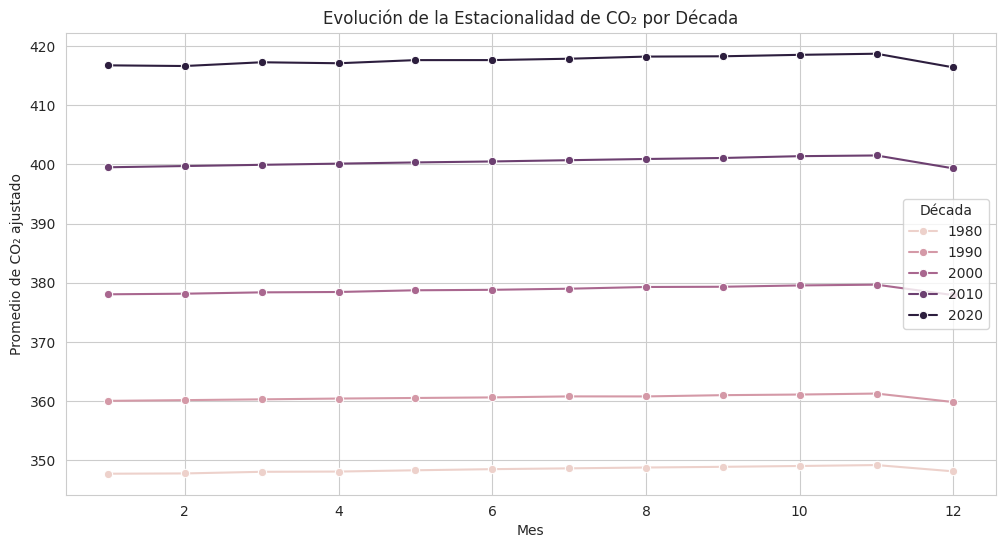

In [48]:
data['decade'] = (data['year'] // 10) * 10  # Crear una columna de décadas

data_grouped = data.groupby(['decade', 'monthdiox'])['de-season alized'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='monthdiox', y='de-season alized', hue='decade', data=data_grouped, marker='o')
plt.ylabel('Promedio de CO₂ ajustado')
plt.xlabel('Mes')
plt.title('Evolución de la Estacionalidad de CO₂ por Década')
plt.legend(title='Década')
plt.show()


### Correlación entre gases y temperatura:
 ✅ Para la correlación entre gases y temperatura, es más óptimo analizar la tendencia en lugar del promedio. Esto te permitirá ver cómo evolucionan conjuntamente a lo largo del tiempo y si existe una relación consistente.


Analizar cómo el aumento en las concentraciones de metano y CO2 se correlaciona con el incremento en las temperaturas globales. Usando las variables: lowess(5), trend (metano) y de-season alized (CO2).

Ejes:

Eje X: lowess(5) (Temperatura global suavizada). Eje Y: trend (Tendencia de metano, ppm). Color (c): de-season alized (Concentraciones de CO2 ajustadas estacionalmente, ppm). Ventajas:

Relacionar las concentraciones de metano (trend) y dióxido de carbono (de-season alized) con la temperatura global (lowess(5)). Es intuitivo porque metano y CO2 son variables que influyen en el calentamiento global, y el color (representando CO2) añade información útil. Por qué es bueno:

Este gráfico tiene sentido porque representa la interacción entre los tres elementos clave en tu análisis (temperatura, metano y CO2). Esto te ayuda a observar si un aumento en metano y CO2 se correlaciona con temperaturas más altas.

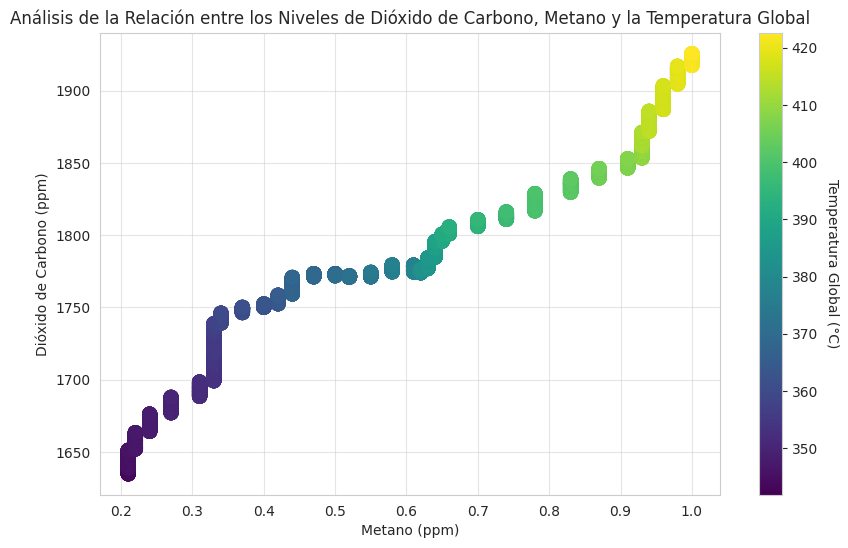

In [49]:
plt.figure(figsize=(10, 6))
sc = plt.scatter(data['lowess(5)'], data['trend'],
                 c=data['de-season alized'], cmap='viridis', s=100)
cbar = plt.colorbar(sc)
cbar.set_label('Temperatura Global (°C)', rotation=270, labelpad=15)
plt.title('Análisis de la Relación entre los Niveles de Dióxido de Carbono, Metano y la Temperatura Global')
plt.xlabel('Metano (ppm)')
plt.ylabel('Dióxido de Carbono (ppm)')
plt.grid(alpha=0.5)
plt.show()


Análisis de la Relación entre los Niveles de Dióxido de Carbono, Metano y la Temperatura Global

Eje X (horizontal): Niveles de metano (en partes por millón, ppm). Eje Y (vertical): Niveles de dióxido de carbono (en ppm). Color de los puntos: Representa la temperatura global (°C). La barra de color a la derecha indica la correspondencia entre el color y la temperatura. Interpretación de la Gráfica

Relación entre Metano y Dióxido de Carbono: La gráfica muestra una tendencia general de que a medida que aumentan los niveles de metano, también aumentan los niveles de dióxido de carbono. Esto sugiere una correlación positiva entre ambos gases de efecto invernadero. Influencia de la Temperatura: El color de los puntos revela que las temperaturas más altas (amarillo) se asocian con niveles más altos de metano y dióxido de carbono. Esto sugiere que la temperatura global está influenciada por las concentraciones de estos gases.

Conclusión
La gráfica sugiere que existe una relación compleja entre el metano, el dióxido de carbono y la temperatura global. El aumento de los niveles de metano parece estar relacionado con el aumento de los niveles de dióxido de carbono, y ambos están asociados con un aumento de la temperatura global.

Consideraciones Adicionales
Causalidad: La gráfica muestra correlación, pero no necesariamente causalidad. Podría haber otros factores que influyen en estas relaciones.
Estos datos respaldan la idea de que los gases de efecto invernadero como el metano y el dióxido de carbono juegan un papel importante en el calentamiento global. La reducción de las emisiones de estos gases podría ser una estrategia efectiva para combatir el cambio climático.
En resumen, la gráfica proporciona evidencia visual de una conexión entre los niveles de metano, dióxido de carbono y la temperatura global. Sin embargo, es importante considerar otros factores y realizar investigaciones adicionales para comprender completamente estas relaciones.




---

## Pruebas y transformaciones:
- ¿En qué orden se hacen estas pruebas y transformaciones?

1. Visualizar la serie temporal (gráfico y ACF) → Identificar patrones de estacionalidad.
2. Prueba de Dickey-Fuller → Ver si los datos son estacionarios.
Si no son estacionarios, hacer diferenciación o transformación logarítmica.
3. Descomposición de la serie → Analizar si hay tendencia o estacionalidad y decidir si se eliminan.
4. Prueba de sesgo → Si la distribución está sesgada, hacer una transformación de normalidad.
5. Aplicar modelo de Machine Learning cuando los datos estén listos.

- Conclusión
Si hay estacionalidad, eliminarla con diferenciación estacional o usar un modelo como SARIMA. Si no es estacionaria, aplicar diferenciación o transformaciones hasta que se vuelva estacionaria. Si hay sesgo, corregirlo con logaritmo, raíz cuadrada o Box-Cox. Todas estas transformaciones se hacen ANTES de aplicar Machine Learning.



##📍 4.3 Estacionariedad y Estacionalidad en los datos
-  ✔ Prueba de Dickey-Fuller: Ver si los datos son estacionarios.
- ✔ Gráficos ACF y PACF: Identificar correlaciones temporales.

 📌 Brebe explicacion :
1. Estacionalidad: Patrones que se repiten en intervalos regulares (ej. picos anuales).
🔹 Si hay estacionalidad: Diferenciación estacional o modelos que la capturen (SARIMA).
🔹 Si no hay estacionalidad: No es necesario modificar los datos.

2. Estacionariedad: La media y varianza no cambian con el tiempo (sin tendencia ni ciclos).
🔹 Si no es estacionaria: Diferenciación o transformaciones (log, Box-Cox) si el modelo lo requiere.
🔹 Si es estacionaria: No se necesitan cambios.

🔹 ¿Solo para ML? Sí, la transformación depende del modelo (ej. ARIMA la necesita, Random Forest no).


### 1. Prueba de Estacionalidad (Visualización con ACF y gráficos)

- Objetivo: Ver si existe un patrón estacional en los datos, es decir, si las variaciones se repiten en intervalos regulares (ej: más ventas en diciembre cada año).
- Cómo se hace:
Gráfico de la serie temporal para ver repeticiones en ciertos períodos.
ACF (Autocorrelation Function): Si hay picos regulares en ciertos lags (por ejemplo, cada 12 meses en una serie anual), la serie tiene estacionalidad.

-Transformaciones Si se detecta estacionalidad:
Diferenciación estacional: Restar el valor de la misma temporada en el período anterior.
Usar modelos como SARIMA: Estos modelos incluyen términos estacionales para capturar el patrón.


In [50]:
from statsmodels.tsa.stattools import adfuller

# Rename the 'monthly average' column to 'dioxido'
data.rename(columns={'monthly average': 'dioxido'}, inplace=True)

# Prueba de Dickey-Fuller aumentada
result = adfuller(data['dioxido'].dropna())

print("Valor p:", result[1])
if result[1] < 0.05:
    print("La serie es estacionaria (rechazamos H0)")
else:
    print("La serie no es estacionaria (no rechazamos H0)")

Valor p: 0.994350501846125
La serie no es estacionaria (no rechazamos H0)


### 2 Prueba de estacionariedad (Dickey-Fuller ADF Test)
Prueba de Dickey Fuller, su objetivo es ver si la serie es estacionaria, es decir, si la media, la varianza y la covarianza son constantes en el tiempo.
Si el p-valor es menor a 0.05, la serie es estacionaria y puede usarse directamente en Machine Learning. Si el p-valor es mayor a 0.05, la serie no es estacionaria y necesita transformaciones. como la Diferenciación: Restar el valor anterior del valor actual para eliminar tendencia. Transformación logarítmica (si la varianza crece con el tiempo). Box-Cox: Para estabilizar la varianza cuando hay heterocedasticidad.
Resultado: Valor p: 0.994350501846125. La serie no es estacionaria (no rechazamos H0)

Si se planea usar un modelo como Random Forest, XGBoost o redes neuronales, no es obligatorio hacer transformaciones como diferenciación o Box-Cox.
Estos modelos no dependen de la estacionaridad, ya que pueden capturar relaciones no lineales y tendencias sin problemas.

Cuándo sí hacer transformaciones:
Si usaras modelos basados en series temporales como ARIMA, SARIMA o modelos estadísticos tradicionales, entonces sí necesitarías hacer la diferenciación u otras transformaciones para cumplir con el supuesto de estacionaridad.


##📍 4.4 Descomposición de la serie temporal
NO es nesecario

Breve explicacion

Razones para hacer la descomposición (STL o similar):

Visualizar tendencia y estacionalidad en los datos.
Determinar si la tendencia es fuerte o débil, lo que puede ayudar a decidir si aplicar modelos como Random Forest o agregar features adicionales.
Analizar la componente residual para ver si hay patrones no capturados por la tendencia/estacionalidad.
Si planeas usar Random Forest sin transformaciones, la descomposición no es obligatoria, pero podría darte insights útiles sobre la estructura de los datos antes de modelar.



La descomposicion:

- Objetivo: Analizar la serie dividiéndola en tendencia, estacionalidad y residual.
- Cómo se hace:
Se usa una descomposición aditiva o multiplicativa.
Si la estacionalidad no es fuerte, la componente estacional será cercana a cero.
Permite entender si la tendencia y la estacionalidad deben eliminarse o modelarse.

-Transformaciones
Si hay estacionalidad fuerte, eliminarla con diferenciación estacional o modelarla con SARIMA.
Si la varianza crece con el tiempo, aplicar transformación logarítmica o Box-Cox.




¿Para qué sirve la descomposición de series temporales?
La descomposición de series temporales nos ayuda a ver qué está impulsando los cambios en la serie. Se divide en tres partes:

Tendencia 📈 → Indica si hay un crecimiento o disminución sostenida a lo largo del tiempo.
Estacionalidad 🔄 → Muestra patrones cíclicos repetitivos (por ejemplo, aumentos cada cierto mes del año).
Ruido o residuo 📊 → Lo que queda después de eliminar la tendencia y estacionalidad (puede ser aleatorio o contener patrones no modelados).
Saber esto nos sirve para:
✅ Identificar si la serie sigue una tendencia o tiene patrones estacionales.
✅ Decidir si debemos aplicar ajustes antes de modelar los datos.
✅ Determinar qué componentes influyen más en la variabilidad del CO₂ y el metano.

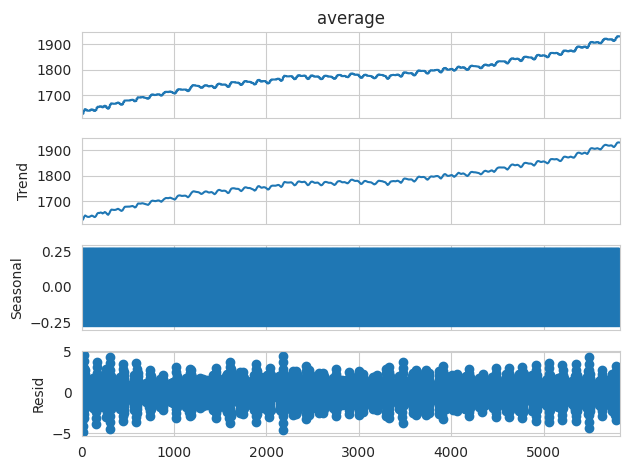

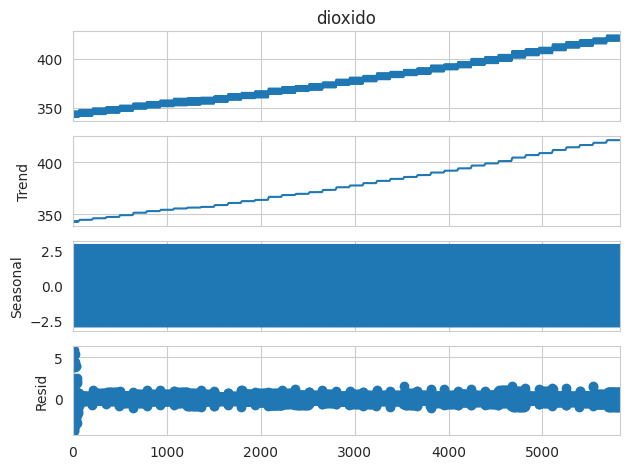

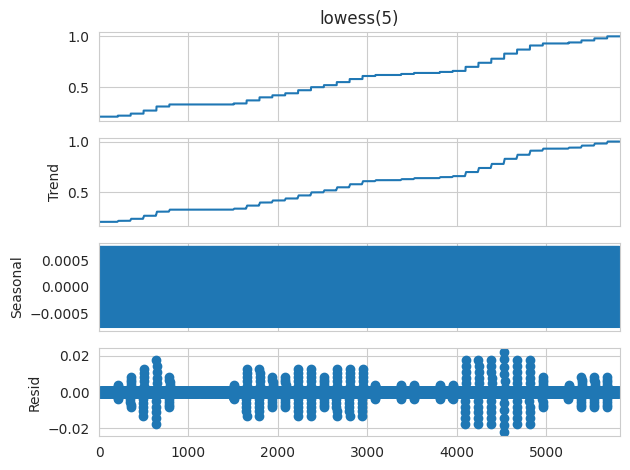

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['average'], model='aditiva', period=12,)
result.plot()
plt.show() #metano

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['dioxido'], model='aditiva', period=12)
result.plot()
plt.show()#c02

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['lowess(5)'], model='aditiva', period=12)
result.plot()
plt.show()#calentamiento global

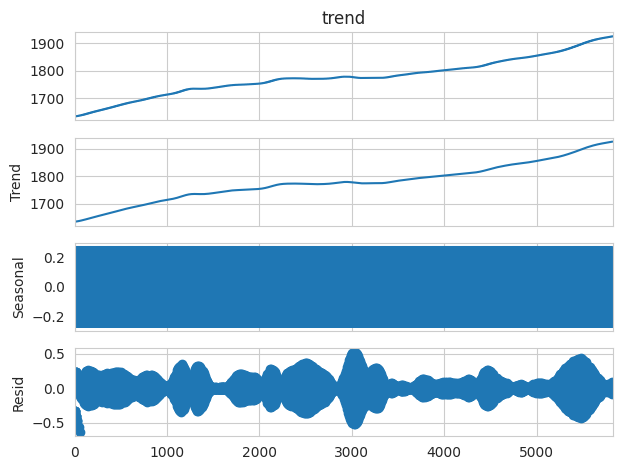

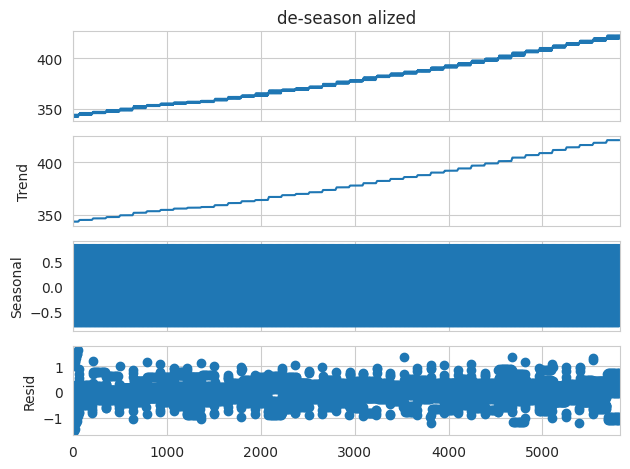

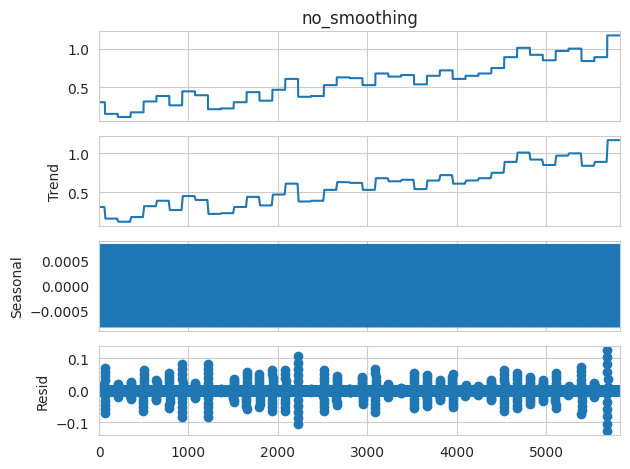

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['trend'], model='aditiva', period=12,)
result.plot()
plt.show() #metano

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['de-season alized'], model='aditiva', period=12)
result.plot()
plt.show()#c02

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['no_smoothing'], model='aditiva', period=12)
result.plot()
plt.show()#calentamiento global


In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición de la serie temporal
decomposition = seasonal_decompose(data['no_smoothing'], model='additive', period=12)

# Obtener los residuos
residuals = decomposition.resid.dropna()  # Eliminar valores NaN

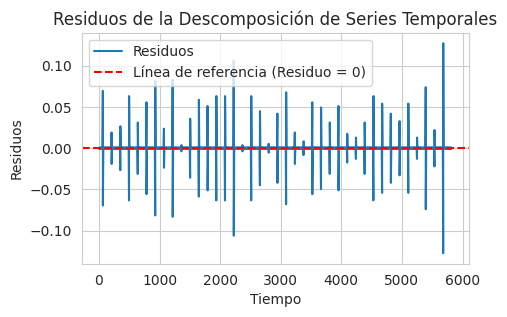

In [54]:
import matplotlib.pyplot as plt

# Graficar los residuos
plt.figure(figsize=(5, 3))
plt.plot(residuals, label='Residuos')
plt.axhline(y=0, color='red', linestyle='--', label='Línea de referencia (Residuo = 0)')
plt.xlabel('Tiempo')
plt.ylabel('Residuos')
plt.title('Residuos de la Descomposición de Series Temporales')
plt.legend()
plt.grid(True)
plt.show()

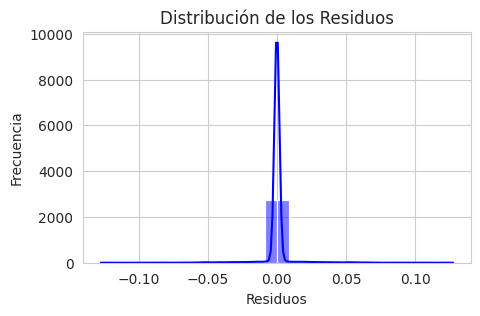

Shapiro-Wilk p-value: 8.764894444755555e-91
Los residuos NO siguen una distribución normal.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5814.
  res = hypotest_fun_out(*samples, **kwds)


In [55]:
from scipy.stats import shapiro

# Histograma de los residuos
plt.figure(figsize=(5, 3))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Residuos')
plt.grid(True)
plt.show()

# Prueba de Shapiro-Wilk
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk p-value: {shapiro_test[1]}")
if shapiro_test[1] > 0.05:
    print("Los residuos siguen una distribución normal.")
else:
    print("Los residuos NO siguen una distribución normal.")

##📍 4.5 Prueba de sesgo (Mide la asimetría de la distribución de los datos.)
NO es necesario


 ✔ Histograma y Boxplot para evaluar normalidad.
 ✔ Transformaciones (logarítmica, raíz cuadrada, Box-Cox) si es necesario.

-  Si es cercano a 0, la distribución es aproximadamente simétrica.
-  Si es positivo, hay una cola más larga a la derecha (valores altos más extremos).
- Si es negativo, hay una cola más larga a la izquierda (valores bajos más extremos).

-Transformaciones
Si la distribución está sesgada:
Logarítmica (cuando los datos tienen sesgo positivo).
Raíz cuadrada (cuando los valores tienen una alta variabilidad).
Box-Cox (cuando la varianza no es constante y los datos son positivos).

En estecaso el resultado:
 El sesgo de 0.078 es muy cercano a 0, lo que indica que la distribución de las variables es prácticamente simétrica.

No es necesario hacer transformaciones (log, Box-Cox, etc.), ya que el sesgo es bajo.

Curtosis (Kurtosis): -0.301
Mide qué tan "afilada" o "plana" es la distribución en comparación con una distribución normal.
Si es ≈ 3, la distribución es similar a una normal (mesocúrtica).
Si es > 3, hay colas más pesadas y más valores extremos (leptocúrtica).
Si es < 3, la distribución es más plana y con menos valores extremos (platicúrtica).
📌 En tu caso:
La curtosis -0.301 indica que la distribución es ligeramente platicúrtica, es decir, un poco más plana que una normal, lo que sugiere menos valores extremos.

In [56]:
from scipy.stats import skew, kurtosis

# Calcular el sesgo (skewness)
skewness = skew(data['trend'])
print(f"Sesgo de la variable: {skewness}")

# Calcular la curtosis
kurt = kurtosis(data['trend'])
print(f"Curtosis de la variable: {kurt}")

# Calcular el sesgo


Sesgo de la variable: 0.07829305910092489
Curtosis de la variable: -0.30145665650580344


In [57]:
# Hacerla ponerla antes de la regresion lineal
import numpy as np

# Transformación logarítmica (solo si no hay valores negativos o ceros)
data['trend_log'] = np.log1p(data['trend'])

# Transformación de raíz cuadrada
data['trend_sqrt'] = np.sqrt(data['trend'])

# Transformación Box-Cox (requiere que todos los valores sean positivos)
from scipy.stats import boxcox
data['trend_boxcox'], lambda_bc = boxcox(data['trend'] + 1)  # Se suma 1 para evitar ceros

print(f"Lambda de Box-Cox: {lambda_bc}")


Lambda de Box-Cox: 0.17917190688481532


#🔹 5. MODELADO Y EVALUACIÓN (Regresiòn Lineal)
📌 Objetivo: Construir modelos predictivos y evaluar su desempeño.
- ✔ Selección del modelo: Regresion lineal
- ✔ Normalización o estandarización de datos para mejorar el rendimiento del modelo.
- ✔ Entrenamiento del modelo con los datos de entrenamiento.
- ✔ Generación de predicciones y comparación con datos reales.
- ✔ Evaluación del rendimiento usando métricas como:
RMSE (Root Mean Squared Error)
MAE (Mean Absolute Error)
R² (Coeficiente de determinación)
- ✔ Optimización del modelo
Ajuste de hiperparámetros.
Pruebas con diferentes configuraciones.


El objetivo del modelo predictivo es predecir la temperatura global (no_smoothing o lowess(5)) en función de las variables independientes (trend de metano y de-seasonalized de CO₂).

Resultados de la Validación Cruzada:
RMSE promedio: 0.09
R² promedio: 0.89
Resultados del Modelo Final (Conjunto de Prueba):
R²: 0.89
MAE: 0.08
RMSE: 0.09


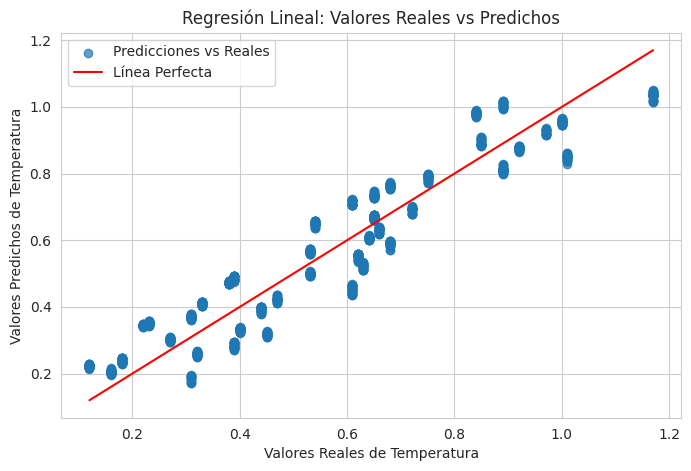

R²: 0.89
MAE: 0.08
RMSE: 0.09
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                 2.278e+04
Date:                Mon, 03 Mar 2025   Prob (F-statistic):               0.00
Time:                        05:48:26   Log-Likelihood:                 5924.0
No. Observations:                5826   AIC:                        -1.184e+04
Df Residuals:                    5823   BIC:                        -1.182e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6757 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# 1. Preparar datos
X = data[['trend', 'de-season alized']].values  # Variables independientes (convertir a numpy array)
y = data['no_smoothing'].values  # Variable dependiente (convertir a numpy array)

# 2. Validación cruzada K-Fold
k = 10  # Número de folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)
rmse_scores = []
r2_scores = []

for train_index, val_index in kf.split(X):
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Normalizar dentro del loop (importante para evitar data leakage)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_fold)
    X_val_scaled = scaler.transform(X_val_fold)

    model = LinearRegression()
    model.fit(X_train_scaled, y_train_fold)

    y_pred = model.predict(X_val_scaled)
    rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred))
    r2 = r2_score(y_val_fold, y_pred)

    rmse_scores.append(rmse)
    r2_scores.append(r2)

rmse_promedio = np.mean(rmse_scores)
r2_promedio = np.mean(r2_scores)

print("Resultados de la Validación Cruzada:")
print(f"RMSE promedio: {rmse_promedio:.2f}")
print(f"R² promedio: {r2_promedio:.2f}")

# 3. Dividir datos en entrenamiento y prueba (para el modelo final)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Normalizar datos de entrenamiento y prueba
scaler_final = StandardScaler()
X_train_scaled = scaler_final.fit_transform(X_train)
X_test_scaled = scaler_final.transform(X_test)

# 5. Entrenar modelo final
model_final = LinearRegression()
model_final.fit(X_train_scaled, y_train)

# 6. Predecir en el conjunto de prueba
y_pred = model_final.predict(X_test_scaled)

# 7. Métricas de evaluación en el conjunto de prueba
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Resultados del Modelo Final (Conjunto de Prueba):")
print(f"R²: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# 8. Graficar resultados
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, label='Predicciones vs Reales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Línea Perfecta')
plt.xlabel('Valores Reales de Temperatura')
plt.ylabel('Valores Predichos de Temperatura')
plt.title('Regresión Lineal: Valores Reales vs Predichos')
plt.legend()
plt.grid(True)
plt.show()

# 9. Resumen estadístico del modelo final (usando statsmodels)
X_const = sm.add_constant(X)  # Agregar constante para el intercepto
model_sm = sm.OLS(y, X_const).fit()
print(f"R²: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

print(model_sm.summary())

In [ ]:
print(model.coef_)  # Coeficientes de CO₂ y metano

[0.01872684 0.22686865]


#### Residuos
Los residuos se calculan después de realizar la regresión. Representan la diferencia entre los valores reales de la variable dependiente (en este caso, la temperatura) y los valores predichos por el modelo. Los residuos son útiles para evaluar el rendimiento del modelo y detectar patrones no capturados por la regresión.

En el gràfico:

Los residuos están distribuidos de manera relativamente aleatoria alrededor de la línea y = 0. No parece haber un patrón claro (como una curva o una tendencia), lo que sugiere que el modelo captura bien la relación lineal entre las variables.

¿Qué más puedes hacer con los residuos? Gráfico de distribución:graficar un histograma de los residuos para ver si siguen una distribución normal. Pruebas estadísticas: como la de Shapiro-Wilk para verificar si los residuos siguen una distribución normal. Mejora del modelo: Si encuentras patrones en los residuos, podrías considerar agregar más variables o usar un modelo no lineal.



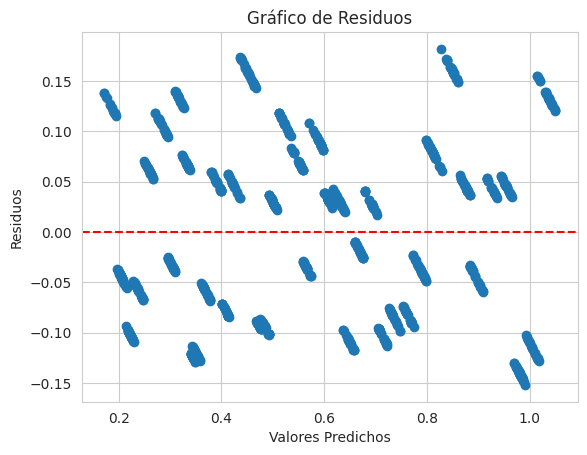

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.show()

#### Histograma de los residuos campana de Gauss
Un histograma es una excelente manera de visualizar la distribución de los residuos. Si los residuos siguen una distribución normal, el histograma debería parecerse a una campana de Gauss (simétrica y centrada en cero).

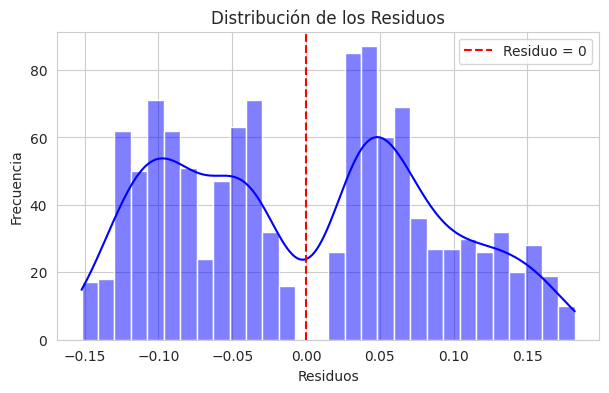

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el histograma de los residuos
plt.figure(figsize=(7, 4))
sns.histplot(residuals, kde=True, color='blue', bins=30)  # kde=True añade la curva de densidad
plt.axvline(x=0, color='red', linestyle='--', label='Residuo = 0')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Residuos')
plt.legend()
plt.grid(True)
plt.show()

#### Prueba de Shapiro-Wilk
La prueba de Shapiro-Wilk es una prueba estadística que evalúa si una muestra de datos sigue una distribución normal. La hipótesis nula es que los datos siguen una distribución normal.

In [ ]:
from scipy.stats import shapiro

# Aplicar la prueba de Shapiro-Wilk
shapiro_test = shapiro(residuals)
print(f"Estadístico de Shapiro-Wilk: {shapiro_test[0]}")
print(f"Valor p: {shapiro_test[1]}")

# Interpretación
if shapiro_test[1] > 0.05:
    print("No se rechaza la hipótesis nula: Los residuos siguen una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: Los residuos NO siguen una distribución normal.")

Estadístico de Shapiro-Wilk: 0.9497675882742189
Valor p: 1.6277666546887756e-19
Se rechaza la hipótesis nula: Los residuos NO siguen una distribución normal.


#🔹 6. MODELADO Y EVALUACIÓN (Random Forest)

📌 Objetivo: Construir modelos predictivos y evaluar su desempeño.
- ✔ Selección del modelo: Random Forest
- ✔ Normalización o estandarización de datos para mejorar el rendimiento del modelo.
- ✔ Entrenamiento del modelo con los datos de entrenamiento.
- ✔ Generación de predicciones y comparación con datos reales.
- ✔ Evaluación del rendimiento usando métricas

El objetivo del modelo predictivo es predecir la temperatura global (no_smoothing o lowess(5)) en función de las variables independientes (trend de metano y de-seasonalized de CO₂).

Resultados del Modelo Ajustado (Random Forest):
R²: 0.9852
MAE: 0.0847
RMSE: 0.1235


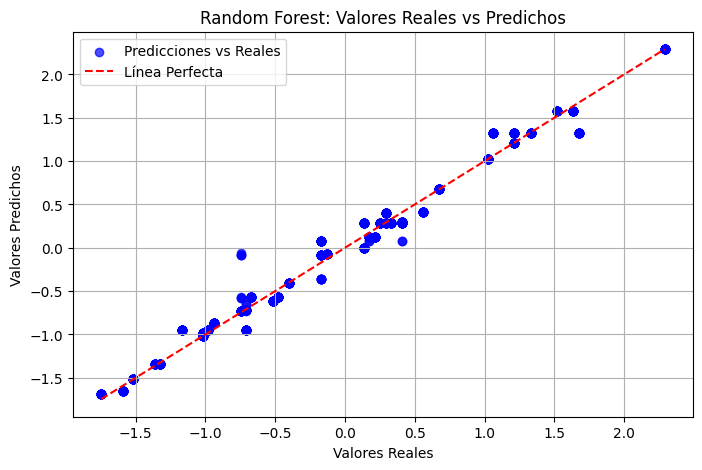

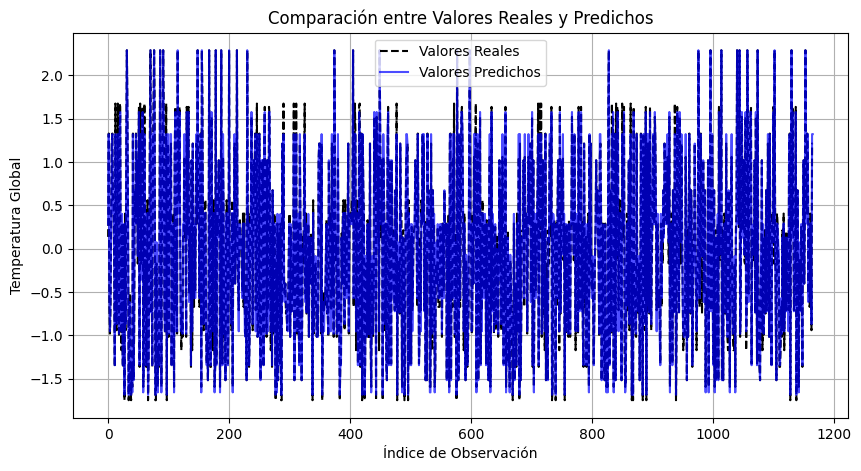

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Preparar datos (suponiendo que 'data' ya está definido)
X = data[['trend', 'de-season alized']].values
y = data['no_smoothing'].values  # Variable dependiente

# 2. Dividir datos en entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalizar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Ajuste de hiperparámetros y entrenamiento del modelo
model_final = RandomForestRegressor(
    n_estimators=50,  # Número de árboles reducido
    max_depth=5,  # Profundidad limitada para evitar sobreajuste
    min_samples_split=10,  # Evita divisiones con pocas muestras
    min_samples_leaf=4,  # Evita hojas con muy pocas muestras
    random_state=42
)

model_final.fit(X_train_scaled, y_train)

# 5. Hacer predicciones
y_pred = model_final.predict(X_test_scaled)

# 6. Evaluar el modelo
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Resultados del Modelo Ajustado (Random Forest):")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

# 7. Visualización: Gráfico de dispersión
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicciones vs Reales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', label='Línea Perfecta')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Random Forest: Valores Reales vs Predichos')
plt.legend()
plt.grid(True)
plt.show()

# 8. Visualización: Comparación de tendencias
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Valores Reales', linestyle='dashed', color='black')
plt.plot(y_pred, label='Valores Predichos', alpha=0.7, color='blue')
plt.xlabel('Índice de Observación')
plt.ylabel('Temperatura Global')
plt.title('Comparación entre Valores Reales y Predichos')
plt.legend()
plt.grid(True)
plt.show()


📊 Interpretación de los Resultados
-
1️⃣ R² = 0.9852 → Indica que el modelo explica el 98.52% de la variabilidad en la temperatura global. Es un resultado excelente.
-
2️⃣ MAE = 0.0847 → En promedio, la diferencia entre los valores reales y los predichos es de 0.0847 unidades de temperatura.
-
3️⃣ RMSE = 0.1235 → Muestra la magnitud promedio del error. Cuanto más bajo, mejor.

-
📢 Conclusión Final
-
✔️ El modelo de Random Forest predice la temperatura global con gran precisión (R² alto y errores bajos).
-
✔️ Los valores predichos siguen de cerca la tendencia real de la temperatura.
-
✔️ La variabilidad de los datos está bien representada, lo que sugiere que no hay sobreajuste extremo.

In [ ]:
from sklearn.model_selection import cross_val_score

# Validación cruzada con 5 folds (puedes ajustar a 10 si deseas)
cv_scores = cross_val_score(model_final, X_train, y_train, cv=5, scoring='r2')

print(f"R² promedio en validación cruzada: {cv_scores.mean():.4f}")
print(f"Desviación estándar: {cv_scores.std():.4f}")


R² promedio en validación cruzada: 0.9845
Desviación estándar: 0.0007


-La validacion cruzada es una técnica que divide los datos en varios subconjuntos (folds) para entrenar y evaluar el modelo múltiples veces. Esto ayuda a verificar que el modelo no dependa demasiado de un solo conjunto de datos y generalice bien en datos nuevos.
 EL R2 0.9845 Indica que el modelo es muy bueno y predice con alta precisión.

 -
 La desviación estándar indica qué tanto varían los valores de R² entre las diferentes pruebas de validación cruzada.
 La desviación estándar es 0.0007 (muy baja), significa que el modelo es estable y generaliza bien, ya que su desempeño casi no cambia entre diferentes conjuntos de validación.


